# **Analyzing Emerging Technology Trends**

According to a recent article by Forbes, 70% of job seekers believe the current labor market is not conducive to landing new job opportunities. This sentiment is also emphasized by the increasing time companies are taking to hire new employees and the growing number of interviews candidates must undergo, creating a challenging landscape for job seekers.
To help navigate this environment, we have conducted an analysis of the skills required for software developer positions, focusing on the programming languages employers are requesting. This analysis is based on the 2024 Stack Overflow Annual Developer Survey, which includes responses from over 65,000 developers regarding their programming experiences and engagement with artificial intelligence.
The primary objective is to empower employees to effectively navigate their job search. By examining AI usage trends, preferences for programming languages among different age groups, and platforms favored in the IT industry, this analysis aims to provide valuable insights into current job trends and in-demand skills. Our goal is to help employees identify key areas of focus in their job search, such as programming languages and technologies to prioritize for enhanced employability.


##**Problem Definition & Data Source**

**Problem Definition:**

This project aims to assess emerging technology trends and provide insights into the current and future demand for programming and technology skills in the job market for software developers.
Identifying the most in-demand programming languages and database skills.
Compare and visualize trends from the 2024 survey with those from 2023 to determine any shifts in demand over the past years.
Investigating and forecasting the future usage of the programming languages identified as the most in demand for 2025.
Compare the programming skills identified in the initial analysis with the languages advertised on job postings (LinkedIn).

**Data Source:**

Stack Overflow Annual Developer Survey 2023 - https://survey.stackoverflow.co/
Stack Overflow Annual Developer Survey 2024 - https://survey.stackoverflow.co/
LinkedIn job postings - https://www.linkedin.com/jobs/



##**Motivation and Summary**


**Motivation:**

The project analyzes tech stack trends from Stack Overflow surveys and LinkedIn job postings. By identifying emerging technologies and assessing skill alignment from 2023 to 2024, it provides insights to guide students on key skills to prioritize, while helping professionals and companies navigate a rapidly evolving tech landscape.

**Summary:**

In this project, we utilized three datasets—the 2023 and 2024 Stack Overflow Developer Surveys, along with data obtained through LinkedIn web scraping—to analyze trends in technology within the current job market. Our analysis includes four main parts: technology trends, compensation analysis for technology roles, LinkedIn job posts analysis, and clustering.
For the first part, we found that while ChatGPT remains the most popular AI tool, other AI tools have also started to grow in popularity. In the analysis of programming languages, we found that JavaScript maintains high popularity across all age groups. Interestingly, older age groups tend to prefer stable and mature languages such as Java and C++. Additionally, for MSBA students, Python and SQL are the most important programming languages. We also conducted an analysis of tools, databases, platforms, and web development frameworks.
In the compensation analysis, we found that the highest-paying tech roles are Senior Executives, AI Developers, and Engineering Managers, with average salaries around or above 200,000 dollars. Additionally, specialized and rare languages like 'Flow' and 'Scala' also command higher salaries.
In LinkedIn job listings, we observed that companies have a high demand for Python and SQL, and these two technologies are frequently mentioned together, highlighting their dominance in data analysis, machine learning, and backend development. Finally, we used machine learning to cluster various technologies and developer skills.

##**Importing Libraries**

Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
import plotly.express as px

Reading the two data files from STACKOVERFLOW SURVEY - 2023 & 2024 and saving it to two dataframes

In [ ]:
df2024 = pd.read_csv('/content/survey_results_public_2024.csv')
df2023 = pd.read_csv('/content/survey_results_public_2023.csv')

## **Data Cleaning & EDA Overview**

Reading through the columns of the two datasets to understand the content and difference, if any

In [ ]:
#To see the difference of columns between the datasets of 2023 and 2024
columns_2024 = pd.DataFrame((df2024.columns.unique()),columns=['Column']).reset_index()
columns_2023 = pd.DataFrame((df2023.columns.unique()),columns=['Column']).reset_index()

columns_2024[columns_2024["Column"].isin(columns_2023["Column"])]
columns_2024[~columns_2024["Column"].isin(columns_2023["Column"])]

,index,Column
5,5,Check
10,10,TechDoc
17,17,BuildvsBuy
18,18,TechEndorse
24,24,LanguageAdmired
27,27,DatabaseAdmired
30,30,PlatformAdmired
33,33,WebframeAdmired
34,34,EmbeddedHaveWorkedWith
35,35,EmbeddedWantToWorkWith


Subsetting the df2023 and saving it to - data2023 to have the columns we need for our futher analysis

In [ ]:
data2023 = df2023[['ResponseId', 'Age', 'Employment', 'EdLevel', 'DevType', 'OrgSize', 'Country',
'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'ProfessionalTech',
'Industry']]

Subsetting the df2024 and saving it to - data2024 to have the columns we need for our futher analysis

In [ ]:
#Subsetting data
data2024 = df2024[['ResponseId', 'Age', 'Employment', 'EdLevel', 'DevType', 'OrgSize', 'Country',
'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'ProfessionalTech',
'Industry']]

Spotted a difference in naming of AI columns in the two sets so renaming for consistency

In [ ]:
data2024.rename(
    columns={'AISearchDevHaveWorkedWith': 'AISearchHaveWorkedWith',
             'AISearchDevWantToWorkWith': 'AISearchWantToWorkWith'
             }, inplace=True)

<ipython-input-6-cadf49322674>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2024.rename(


Removing any missing values from 'ResponseId' and 'Employment' columns to ensure clean and relevant data for accurately analyzing employment status trends.

In [ ]:
#Split the options in the column 'Employment' and decide what whould we exclude.

#Filtering the targeted employment status for our data
data_employment = data2023[['ResponseId', 'Employment']]
#Drop missing values of column 'Employment'
data_employment = data_employment.dropna(subset=['Employment'])


#same thing for data in 2024

#Filtering the targeted employment status for our data
data_employment2024 = data2024[['ResponseId', 'Employment']]
#Drop missing values of column 'Employment'
data_employment2024 = data_employment2024.dropna(subset=['Employment'])

We are keeping records exclusively for full-time employees and researchers, as our focus is to identify the skills that are crucial in actual job roles and highly sought after by employers. By narrowing our research to these specific groups, we aim to obtain more precise insights into the competencies that are essential in the workforce and better align our analysis with current industry demands.

In [ ]:
#Drop the data if their options include 'Not employed, and not looking for work', 'Student, full-time', 'Student, part-time', 'Retired', 'I prefer not to say'.
exclude_words_students_inside = ['Not employed, and not looking for work', 'Student, full-time', 'Student, part-time', 'Retired', 'I prefer not to say']
filter = data_employment['Employment'].str.contains('|'.join(exclude_words_students_inside))
data_employment_without_students = data_employment[~filter].reset_index()

#Combine the targeted employment status with our original data
data2023_targeted_employment_without_students = data2023[data2023['ResponseId'].isin(data_employment_without_students['ResponseId'])]
data2023_targeted_employment_without_students


#same thing for data in 2024

#Combine the targeted employment status with our original data
data2024_targeted_employment_without_students = data2024[data2024['ResponseId'].isin(data_employment_without_students['ResponseId'])]
data2024_targeted_employment_without_students

,ResponseId,Age,Employment,EdLevel,DevType,OrgSize,Country,Currency,CompTotal,LanguageHaveWorkedWith,...,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,ProfessionalTech,Industry
1,2,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,...,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,NaN,NaN,NaN,NaN
2,3,45-54 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Developer Experience,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAUI,MSBuild,MSBuild,Visual Studio,Visual Studio,NaN,NaN,NaN,NaN
3,4,18-24 years old,"Student, full-time",Some college/university study without earning ...,"Developer, full-stack",NaN,Canada,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,...,NumPy;Pandas;Ruff;TensorFlow,NaN,Docker;npm;Pip,Docker;Kubernetes;npm,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18-24 years old,"Student, full-time","Secondary school (e.g. American high school, G...","Developer, full-stack",NaN,Norway,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,...,NaN,NaN,APT;Make;npm,APT;Make,Vim,Vim,NaN,NaN,NaN,NaN
5,6,Under 18 years old,"Student, full-time",Primary/elementary school,Student,NaN,United States of America,NaN,NaN,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,...,NaN,NaN,Docker;Homebrew;npm;Pip;pnpm,Homebrew;npm;Pip;pnpm,Nano;Vim;Visual Studio Code;Xcode,Nano;Vim;Visual Studio Code;Xcode,ChatGPT;GitHub Copilot;OpenAI Codex,ChatGPT;GitHub Copilot,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,18-24 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Blockchain,2 to 9 employees,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,25-34 years old,"Employed, full-time",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, mobile","1,000 to 4,999 employees",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,18-24 years old,"Employed, full-time","Secondary school (e.g. American high school, G...","Developer, back-end",20 to 99 employees,Germany,EUR European Euro,NaN,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,...,GTK;OpenGL,NaN,Ansible;APT;Docker;Make;npm;Pip;Podman,Ansible;APT;Docker;Make;npm;Pip;Podman,Vim;Visual Studio Code,Vim;Visual Studio Code,NaN,NaN,NaN,NaN


In [ ]:
data2023_targeted_employment_without_students.isnull().sum()

,0
ResponseId,0
Age,0
Employment,0
EdLevel,0
DevType,417
OrgSize,6054
Country,0
Currency,5802
CompTotal,22552
LanguageHaveWorkedWith,558


Dropping missing values from the 'DevType' and 'OrgSize' columns in the target DataFrame to ensure data quality, while excluding student responses for a more focused analysis.




In [ ]:
data2023_targeted_employment_without_students = data2023_targeted_employment_without_students.dropna(subset=['DevType','OrgSize'], how='any')

#Do the same thing for data in 2024

data2024_targeted_employment_without_students = data2024_targeted_employment_without_students.dropna(subset=['DevType','OrgSize'], how='any')

Checking the unique age groups in the column 'Age'.

In [ ]:
data2023_targeted_employment_without_students['Age'].unique()

array(['25-34 years old', '45-54 years old', '35-44 years old',
       'Under 18 years old', '55-64 years old', '18-24 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

We are restricting our analysis to individuals aged 18 to 55 to focus on the active working population most relevant to our study of employment trends and skills in demand. Data outside this age range will be dropped to ensure the insights are aligned with the typical career stages and employment dynamics within this group.

In [ ]:
#Drop the data with age under 18 years old, '55-64 years old', '65 years or older', and 'Prefer not to say' in 2023.
exclude_age = ['Under 18 years old', 'Prefer not to say', '55-64 years old', '65 years or older']
filter2 = (data2023_targeted_employment_without_students['Age']=='Under 18 years old')|(data2023_targeted_employment_without_students['Age']=='Prefer not to say')|(data2023_targeted_employment_without_students['Age']=='55-64 years old')|(data2023_targeted_employment_without_students['Age']=='65 years or older')
data2023_targeted_employment_without_students = data2023_targeted_employment_without_students[~filter2]
data2023_targeted_employment_without_students.shape

#Do the same thing for data in 2024
filter3 = (data2024_targeted_employment_without_students['Age']=='Under 18 years old')|(data2024_targeted_employment_without_students['Age']=='Prefer not to say')|(data2024_targeted_employment_without_students['Age']=='55-64 years old')|(data2024_targeted_employment_without_students['Age']=='65 years or older')
data2024_targeted_employment_without_students = data2024_targeted_employment_without_students[~filter3]
data2024_targeted_employment_without_students.shape

(36774, 27)

**EDA Overview**

Our project included certain EDA steps, such as isolating specific features within the survey data, including employment type, education level, developer roles, organization size, country, and compensation totals. Additionally, the datasets contained columns indicating current and desired technologies (programming languages, databases, platforms, and tools). Initial steps involved creating subsets that focused on these features to explore technology usage trends and professional characteristics within different roles and regions.
Following data preparation, the analysis included:
Feature Comparison: Examining the frequency of various technologies used in 2023 versus 2024.
Visualization: We used libraries like matplotlib and seaborn to visualize trends in technology adoption, such as the popularity of programming languages over the years.
This stage set the foundation for detecting trends, such as the evolution of technology preferences among specific developer roles or regions over time.

##**Technology Adoption and Usage Trends 2023 v/s 2024**

**Has the adoption and usage of AI technologies by businesses and individuals significantly increased between 2023 and 2024?**

Function to split the AISearchHaveWorkedWith column to analyse the different AI used over the years 2023 and 2024.
Result is stored in data frames called data2023_ai_tools and data2024_ai_tools with ResponseId, Age, AISearchHaveWorkedWith, Country,and DevType.


In [ ]:
def split_AITools(df):
    rows = []
    for _, row in df.iterrows():
        # Split the column 'AISearchHaveWorkedWith' if it's not NaN
        if pd.notna(row['AISearchHaveWorkedWith']):
            ai_tools = row['AISearchHaveWorkedWith'].split(';')
            # Create a new list for every AI tool after splitting them
            for tool in ai_tools:
                rows.append({
                    'ResponseId': row['ResponseId'],
                    'Age': row['Age'],
                    'AISearchHaveWorkedWith': tool.strip(),
                    'Country': row['Country'],  # Include other relevant columns as needed
                    'DevType': row['DevType']
                })
    # Return expanded DataFrame
    return pd.DataFrame(rows)

# Use the function to split and expand the dataframe.
data2023_ai_tools = split_AITools(data2023).reset_index(drop=True)
data2024_ai_tools = split_AITools(data2024).reset_index(drop=True)

# Show the results.
data2023_ai_tools
data2024_ai_tools

,ResponseId,Age,AISearchHaveWorkedWith,Country,DevType
0,6,Under 18 years old,ChatGPT,United States of America,Student
1,6,Under 18 years old,GitHub Copilot,United States of America,Student
2,6,Under 18 years old,OpenAI Codex,United States of America,Student
3,8,18-24 years old,ChatGPT,Uzbekistan,Student
4,10,35-44 years old,ChatGPT,Serbia,"Developer, full-stack"
...,...,...,...,...,...
103853,65415,18-24 years old,ChatGPT,NaN,NaN
103854,65415,18-24 years old,GitHub Copilot,NaN,NaN
103855,65415,18-24 years old,Google Gemini,NaN,NaN
103856,65415,18-24 years old,Visual Studio Intellicode,NaN,NaN


Here, we count the unique number of AI tools respondents have worked with.

In [ ]:
# Count the number of occurrences of each AI tool
ai_counts_2023 = data2023_ai_tools['AISearchHaveWorkedWith'].value_counts()
ai_counts_2024 = data2024_ai_tools['AISearchHaveWorkedWith'].value_counts()

Percentage of AI Tools usage is calculated for the year 2023 and 2024.
We have used percentage instead of count since there are different number of people in the survey data for the two years.
A bar plot showing the comparision of 9 most common AI tools is drawn.

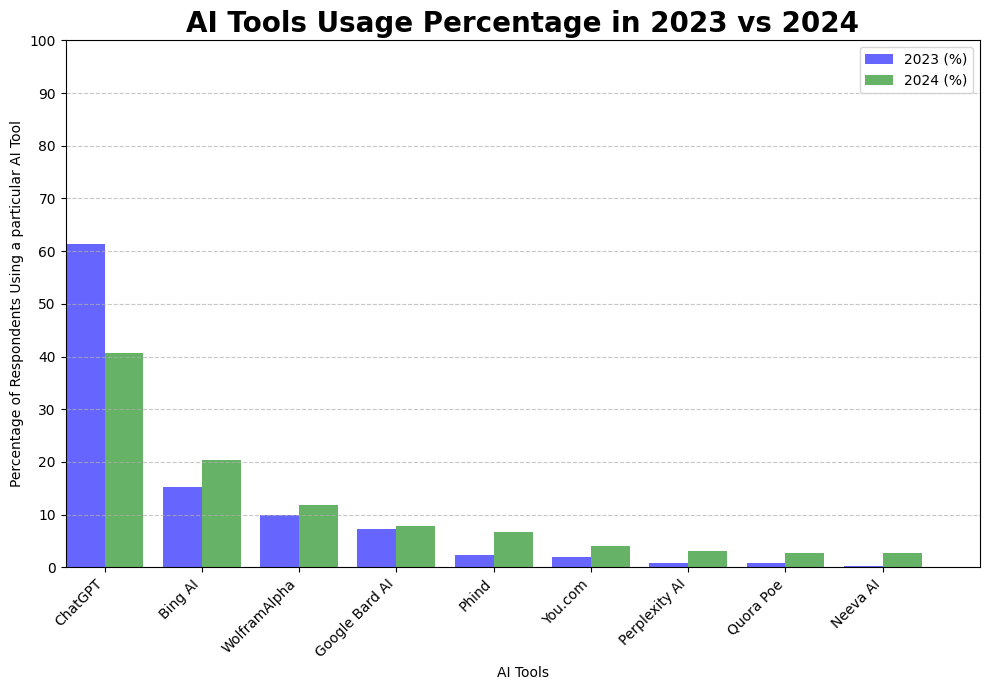

In [ ]:
# Calculate percentages for 2023 and 2024
ai_counts_2023_percent = (ai_counts_2023[:9] / ai_counts_2023[:9].sum()) * 100
ai_counts_2024_percent = (ai_counts_2024[:9] / ai_counts_2024[:9].sum()) * 100

# Set bar width and create an array of positions for the x-axis
bar_width = 0.4
x = np.arange(len(ai_counts_2023_percent))  # Positions for the bars

# Plot settings
fig, ax = plt.subplots(figsize=(10, 7))

# Bar plot for 2023 AI tool percentages (shift to the left by bar_width/2)
bars1 = ax.bar(x - bar_width/2, ai_counts_2023_percent, width=bar_width, color='blue', alpha=0.6, label='2023 (%)')

# Bar plot for 2024 AI tool percentages (shift to the right by bar_width/2)
bars2 = ax.bar(x + bar_width/2, ai_counts_2024_percent, width=bar_width, color='green', alpha=0.6, label='2024 (%)')

# Add labels and title
ax.set_xlabel('AI Tools')
ax.set_ylabel('Percentage of Respondents Using a particular AI Tool')
ax.set_title('AI Tools Usage Percentage in 2023 vs 2024', fontweight='bold', fontsize = 20)
ax.legend()

# Set custom x-ticks in the middle of the bars
ax.set_xticks(x)
ax.set_xticklabels(ai_counts_2023_percent.index, rotation=45, ha='right')
ax.set_xlim(-bar_width, len(ai_counts_2023_percent))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 70)
ax.set_yticks(np.arange(0, 101, 10))
# Show plot
plt.tight_layout()
plt.show()


*The bar chart illustrates the trends in AI tool adoption from 2023 to 2024. ChatGPT remained the most popular tool in both years, though its usage dropped significantly from over 60% in 2023 to approximately 40% in 2024. Meanwhile, tools like GitHub Copilot and Google Gemini saw increased adoption in 2024, indicating a shift towards more specialized AI applications. Tools like Bing AI, Visual Studio IntelliCode, and Claude also showed moderate growth in usage, suggesting the rise of diverse AI tools for developers and businesses alike.*

**How do the preferences for the top programming languages vary across different age groups between 2023 and 2024?**

This code block prepares two separate dataframes for analyzing programming languages used and desired by respondents, extracting relevant columns from the 2023 and 2024 datasets to facilitate insights into programming language preferences across different demographics.


In [ ]:
language_using_list = ['ResponseId', 'Age', 'Employment', 'EdLevel', 'DevType', 'OrgSize', 'Country',
          'LanguageHaveWorkedWith', 'Industry']
language_desire_list = ['ResponseId', 'Age', 'Employment', 'EdLevel', 'DevType', 'OrgSize', 'Country',
          'LanguageWantToWorkWith', 'Industry']

data2023_language_using = data2023_targeted_employment_without_students[language_using_list]
data2023_language_desire = data2023_targeted_employment_without_students[language_desire_list]


data2024_language_using = data2024_targeted_employment_without_students[language_using_list]
data2024_language_desire = data2024_targeted_employment_without_students[language_desire_list]

In [ ]:
data2023_language_using.isnull().sum()

,0
ResponseId,0
Age,0
Employment,0
EdLevel,0
DevType,0
OrgSize,0
Country,0
LanguageHaveWorkedWith,260
Industry,27779


In [ ]:
#Drop the missing values for column 'LanguageHaveWorkedWith'
data2023_language_using = data2023_language_using.dropna(subset=['LanguageHaveWorkedWith'])
data2023_language_using.shape


#Do the same thing for data in 2024
data2024_language_using = data2024_language_using.dropna(subset=['LanguageHaveWorkedWith'])
data2024_language_using.shape

(35655, 9)

Function to split the languages in the 'LanguageHaveWorkedWith' column.

In [ ]:
def split_Language_using(df):
    rows = []
    for _, row in df.iterrows():
        # Split the column 'LanguageHaveWorkedWith'.
        languages = row['LanguageHaveWorkedWith'].split(';')
        # Create a new list for every language after splitting them.
        for language in languages:
            rows.append({
                'ResponseId': row['ResponseId'],
                'Age': row['Age'],
                'LanguageHaveWorkedWith': language.strip(),
                'DevType': row['DevType']
            })
    # Return expanded DataFrame
    return pd.DataFrame(rows)

data2023_language_using_expanded = split_Language_using(data2023_language_using).reset_index()
data2023_language_using_expanded


data2024_language_using_expanded = split_Language_using(data2024_language_using).reset_index()
data2024_language_using_expanded

,index,ResponseId,Age,LanguageHaveWorkedWith,DevType
0,0,73,18-24 years old,Assembly,Data scientist or machine learning specialist
1,1,73,18-24 years old,Bash/Shell (all shells),Data scientist or machine learning specialist
2,2,73,18-24 years old,C,Data scientist or machine learning specialist
3,3,73,18-24 years old,C++,Data scientist or machine learning specialist
4,4,73,18-24 years old,HTML/CSS,Data scientist or machine learning specialist
...,...,...,...,...,...
190111,190111,65436,18-24 years old,Lua,"Developer, back-end"
190112,190112,65436,18-24 years old,Objective-C,"Developer, back-end"
190113,190113,65436,18-24 years old,Python,"Developer, back-end"
190114,190114,65436,18-24 years old,Rust,"Developer, back-end"


Created data frames grouping 'LanguageHaveWorkedWith' with 'Age' to study the trends among age groups

In [ ]:
#Create the dataframe for different ages, and see which programming skills are used the most among different ages.
data2023_language_using_expanded_by_age = data2023_language_using_expanded.rename(columns={'index': 'counts'})
data2023_language_using_expanded_by_age = data2023_language_using_expanded_by_age.groupby(['Age','LanguageHaveWorkedWith'])['counts'].count().sort_values(ascending=False).reset_index()

# Calculate the total counts for every age levels to get the percentage for data in 2023
data2023_language_using_expanded_by_age['total_counts'] = data2023_language_using_expanded_by_age.groupby('Age')['counts'].transform('sum')
#Calculate the percentage
data2023_language_using_expanded_by_age['percentage'] = (data2023_language_using_expanded_by_age['counts'] / data2023_language_using_expanded_by_age['total_counts']) * 100

#Do the same thing for data in 2024

data2024_language_using_expanded_by_age = data2024_language_using_expanded.rename(columns={'index': 'counts'})
data2024_language_using_expanded_by_age = data2024_language_using_expanded_by_age.groupby(['Age','LanguageHaveWorkedWith'])['counts'].count().sort_values(ascending=False).reset_index()

data2024_language_using_expanded_by_age['total_counts'] = data2024_language_using_expanded_by_age.groupby('Age')['counts'].transform('sum')
#Calculate the percentage
data2024_language_using_expanded_by_age['percentage'] = (data2024_language_using_expanded_by_age['counts'] / data2024_language_using_expanded_by_age['total_counts']) * 100


This code block generates bar plots to compare the usage percentages of the top seven programming languages among different age groups for the years 2023 and 2024, facilitating an analysis of trends and shifts in programming language preferences across age demographics.


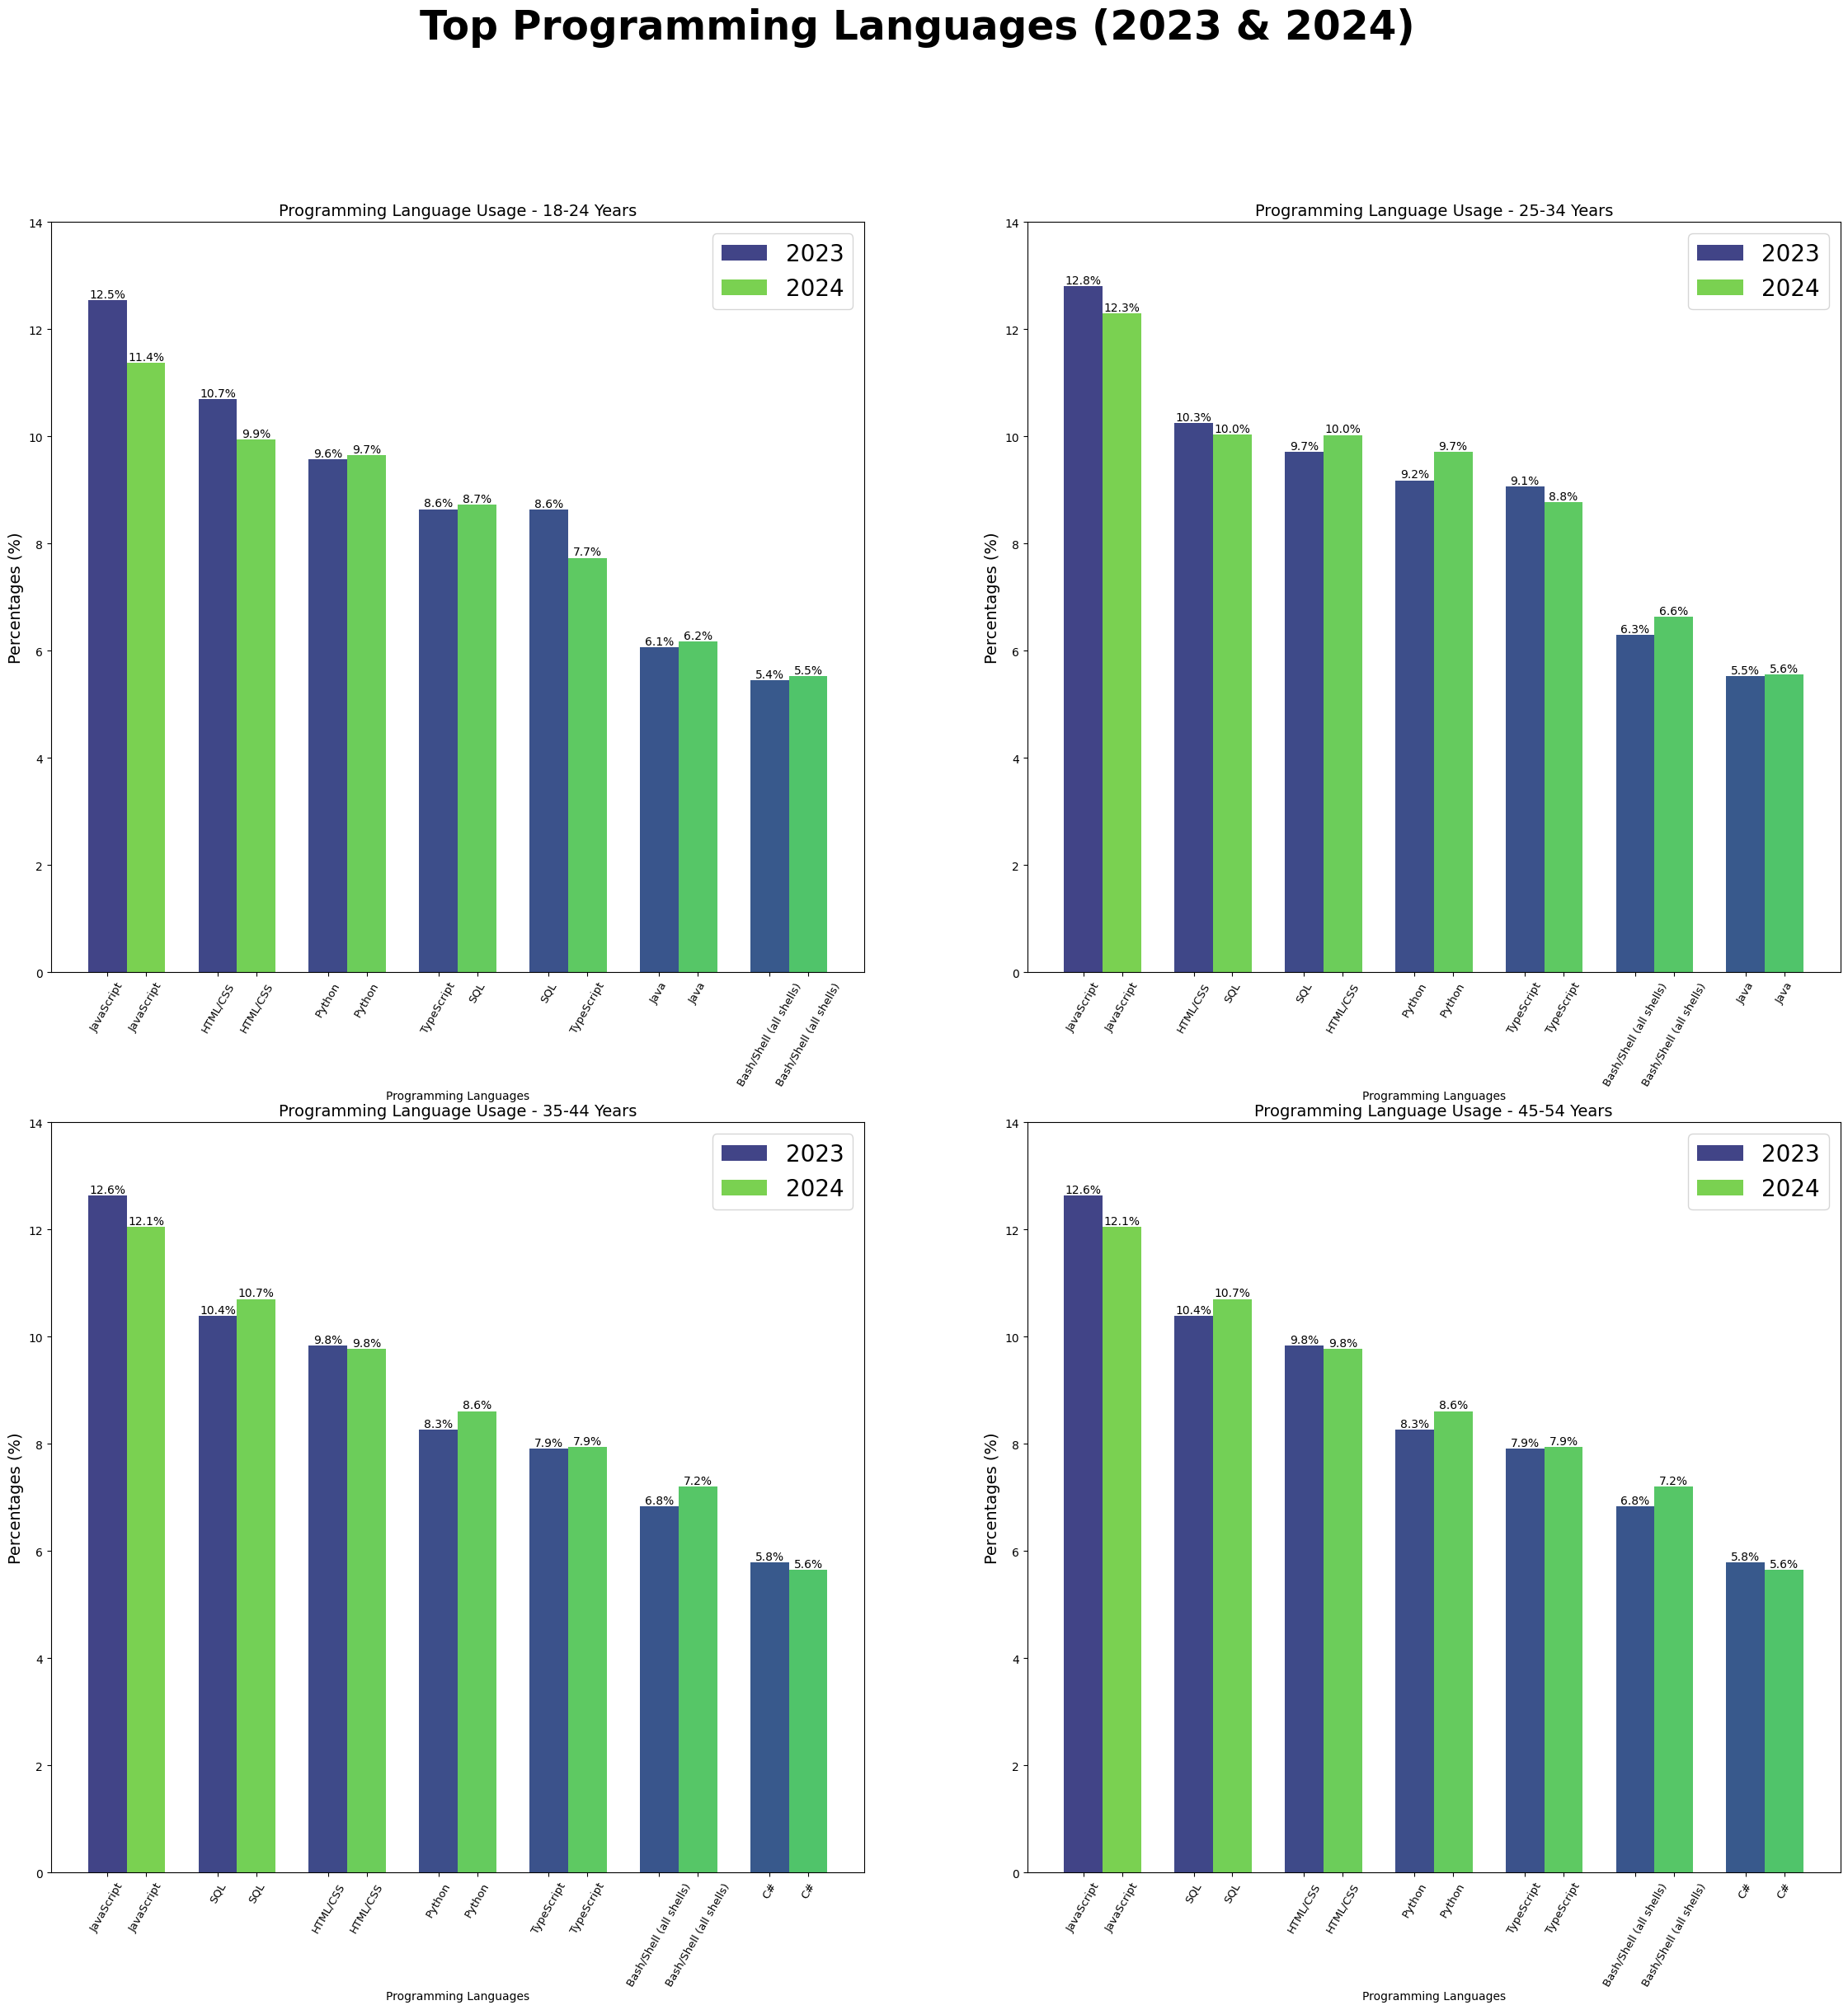

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(28, 26))

# Define the width of the bars
bar_width = 0.35

# Define the top 7 x data for the group
x_2023 = np.arange(0, 7)
x_2024 = np.arange(0, 7)

#Plot for the age within '18-24 years old'
bars_2023 = axes[0,0].bar(x_2023 - bar_width/2,
            height=data2023_language_using_expanded_by_age[data2023_language_using_expanded_by_age['Age']=='18-24 years old']['percentage'].values[0:7],
              width=bar_width,
              color=cm.viridis(np.linspace(0.2, 0.5, 25)),
              label='2023')

bars_2024 = axes[0,0].bar(x_2024 + bar_width/2,
            height=data2024_language_using_expanded_by_age[data2024_language_using_expanded_by_age['Age']=='18-24 years old']['percentage'].values[0:7],
              width=bar_width,
              color=cm.viridis(np.linspace(0.8, 0.5, 25)),
              label='2024')

axes[0,0].set_title('Programming Language Usage - 18-24 Years', fontsize=14)
axes[0,0].set_xlabel('Programming Languages', fontsize=10, labelpad=2.5)
axes[0,0].set_ylabel('Percentages (%)', fontsize=14)
axes[0,0].set_ylim(0, 14)

# Set xticks and xticklabels for 2023 and 2024 separately
xticks_combined = np.array([-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175,
        3.825, 4.175, 4.825, 5.175, 5.825, 6.175])
axes[0,0].set_xticks(xticks_combined)

# Concatenate both labels with spaces between to differentiate 2023 and 2024 languages
xtick_labels_2023 = data2023_language_using_expanded_by_age[data2023_language_using_expanded_by_age['Age']=='18-24 years old']['LanguageHaveWorkedWith'][0:7]
xtick_labels_2024 = data2024_language_using_expanded_by_age[data2024_language_using_expanded_by_age['Age']=='18-24 years old']['LanguageHaveWorkedWith'][0:7]

# Assign the labels for 2023 and 2024 separately to ensure correct alignment
combined_labels = []
for label_2023, label_2024 in zip(xtick_labels_2023, xtick_labels_2024):
    combined_labels.append(label_2023)
    combined_labels.append(label_2024)
axes[0,0].set_xticklabels(combined_labels, rotation=60, ha='center', fontsize=9.5)

# Add labels to each bar
for bar in bars_2023:
    axes[0,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_2024:
    axes[0,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

axes[0,0].legend(fontsize=20)


#Plot for the age within '25-34 years old'

bars_2023 = axes[0,1].bar(x_2023 - bar_width/2,
            height=data2023_language_using_expanded_by_age[data2023_language_using_expanded_by_age['Age']=='25-34 years old']['percentage'].values[0:7],
              width=bar_width,
              color=cm.viridis(np.linspace(0.2, 0.5, 25)),
              label='2023')

bars_2024 = axes[0,1].bar(x_2024 + bar_width/2,
            height=data2024_language_using_expanded_by_age[data2024_language_using_expanded_by_age['Age']=='25-34 years old']['percentage'].values[0:7],
              width=bar_width,
              color=cm.viridis(np.linspace(0.8, 0.5, 25)),
              label='2024')

axes[0,1].set_title('Programming Language Usage - 25-34 Years', fontsize=14)
axes[0,1].set_xlabel('Programming Languages', fontsize=10, labelpad=2.5)
axes[0,1].set_ylabel('Percentages (%)', fontsize=14)
axes[0,1].set_ylim(0, 14)

# Set xticks and xticklabels for 2023 and 2024 separately
xticks_combined = np.array([-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175,
        3.825, 4.175, 4.825, 5.175, 5.825, 6.175])
axes[0,1].set_xticks(xticks_combined)

# Concatenate both labels with spaces between to differentiate 2023 and 2024 languages
xtick_labels_2023 = data2023_language_using_expanded_by_age[data2023_language_using_expanded_by_age['Age']=='25-34 years old']['LanguageHaveWorkedWith'][0:7]
xtick_labels_2024 = data2024_language_using_expanded_by_age[data2024_language_using_expanded_by_age['Age']=='25-34 years old']['LanguageHaveWorkedWith'][0:7]

# Assign the labels for 2023 and 2024 separately to ensure correct alignment
combined_labels = []
for label_2023, label_2024 in zip(xtick_labels_2023, xtick_labels_2024):
    combined_labels.append(label_2023)
    combined_labels.append(label_2024)
axes[0,1].set_xticklabels(combined_labels, rotation=60, ha='center', fontsize=9.5)

# Add labels to each bar
for bar in bars_2023:
    axes[0,1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_2024:
    axes[0,1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

axes[0,1].legend(fontsize=20)


#Plot for the age within '35-44 years old'

bars_2023 = axes[1,0].bar(x_2023 - bar_width/2,
            height=data2023_language_using_expanded_by_age[data2023_language_using_expanded_by_age['Age']=='35-44 years old']['percentage'].values[0:7],
              width=bar_width,
              color=cm.viridis(np.linspace(0.2, 0.5, 25)),
              label='2023')

bars_2024 = axes[1,0].bar(x_2024 + bar_width/2,
            height=data2024_language_using_expanded_by_age[data2024_language_using_expanded_by_age['Age']=='35-44 years old']['percentage'].values[0:7],
              width=bar_width,
              color=cm.viridis(np.linspace(0.8, 0.5, 25)),
              label='2024')

axes[1,0].set_title('Programming Language Usage - 35-44 Years', fontsize=14)
axes[1,0].set_xlabel('Programming Languages', fontsize=10, labelpad=2.5)
axes[1,0].set_ylabel('Percentages (%)', fontsize=14)
axes[1,0].set_ylim(0, 14)

# Set xticks and xticklabels for 2023 and 2024 separately
xticks_combined = np.array([-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175,
        3.825, 4.175, 4.825, 5.175, 5.825, 6.175])
axes[1,0].set_xticks(xticks_combined)

# Concatenate both labels with spaces between to differentiate 2023 and 2024 languages
xtick_labels_2023 = data2023_language_using_expanded_by_age[data2023_language_using_expanded_by_age['Age']=='35-44 years old']['LanguageHaveWorkedWith'][0:7]
xtick_labels_2024 = data2024_language_using_expanded_by_age[data2024_language_using_expanded_by_age['Age']=='35-44 years old']['LanguageHaveWorkedWith'][0:7]

# Assign the labels for 2023 and 2024 separately to ensure correct alignment
combined_labels = []
for label_2023, label_2024 in zip(xtick_labels_2023, xtick_labels_2024):
    combined_labels.append(label_2023)
    combined_labels.append(label_2024)
axes[1,0].set_xticklabels(combined_labels, rotation=60, ha='center', fontsize=9.5)

# Add labels to each bar
for bar in bars_2023:
    axes[1,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_2024:
    axes[1,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

axes[1,0].legend(fontsize=20)


#Plot for the age within '45-54 years old'

bars_2023 = axes[1,1].bar(x_2023 - bar_width/2,
            height=data2023_language_using_expanded_by_age[data2023_language_using_expanded_by_age['Age']=='35-44 years old']['percentage'].values[0:7],
              width=bar_width,
              color=cm.viridis(np.linspace(0.2, 0.5, 25)),
              label='2023')

bars_2024 = axes[1,1].bar(x_2024 + bar_width/2,
            height=data2024_language_using_expanded_by_age[data2024_language_using_expanded_by_age['Age']=='35-44 years old']['percentage'].values[0:7],
              width=bar_width,
              color=cm.viridis(np.linspace(0.8, 0.5, 25)),
              label='2024')

axes[1,1].set_title('Programming Language Usage - 45-54 Years', fontsize=14)
axes[1,1].set_xlabel('Programming Languages', fontsize=10, labelpad=2.5)
axes[1,1].set_ylabel('Percentages (%)', fontsize=14)
axes[1,1].set_ylim(0, 14)

# Set xticks and xticklabels for 2023 and 2024 separately
xticks_combined = np.array([-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175,
        3.825, 4.175, 4.825, 5.175, 5.825, 6.175])
axes[1,1].set_xticks(xticks_combined)

# Concatenate both labels with spaces between to differentiate 2023 and 2024 languages
xtick_labels_2023 = data2023_language_using_expanded_by_age[data2023_language_using_expanded_by_age['Age']=='35-44 years old']['LanguageHaveWorkedWith'][0:7]
xtick_labels_2024 = data2024_language_using_expanded_by_age[data2024_language_using_expanded_by_age['Age']=='35-44 years old']['LanguageHaveWorkedWith'][0:7]

# Assign the labels for 2023 and 2024 separately to ensure correct alignment
combined_labels = []
for label_2023, label_2024 in zip(xtick_labels_2023, xtick_labels_2024):
    combined_labels.append(label_2023)
    combined_labels.append(label_2024)
axes[1,1].set_xticklabels(combined_labels, rotation=60, ha='center', fontsize=9.5)

# Add labels to each bar
for bar in bars_2023:
    axes[1,1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_2024:
    axes[1,1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

axes[1,1].legend(fontsize=20)

plt.suptitle('Top Programming Languages (2023 & 2024)', fontsize=35, fontweight='bold')
plt.show()


*The data reveals that while certain languages, such as Python and JavaScript, maintain high popularity across all age groups, there are slight shifts in preferences from 2023 to 2024. For younger age groups (18-24), Python sees consistent usage, while languages like Java and C# show a decrease in preference. In the 25-34 age group, Python and JavaScript remain dominant, but newer languages like Rust and Go gain momentum. For older age groups (35-44), the changes in percentages suggest a shift towards more stable, mature languages like Java and C++, while younger languages see less adoption.
This trend could impact decisions in education (emphasizing Python and JavaScript for younger audiences) and recruitment (seeking Rust/Go expertise for mid-level roles). Technology stacks for companies should consider the sustained popularity of Python and JavaScript across all age groups while keeping an eye on niche languages that are gaining traction in certain demographics.*


**Analyzing the Variation of Top Tools and Technologies Across Organizations of Different Sizes**

This code block prepares two separate dataframes for analyzing programming languages used by respondents, extracting relevant columns from the 2023 and 2024 datasets to facilitate insights into tools and technologies used in organizations of different sizes.


In [ ]:
tools_using_list = ['ResponseId', 'Age', 'Employment', 'EdLevel', 'DevType', 'OrgSize', 'Country',
          'ToolsTechHaveWorkedWith', 'Industry']
tools_desire_list = ['ResponseId', 'Age', 'Employment', 'EdLevel', 'DevType', 'OrgSize', 'Country',
          'ToolsTechWantToWorkWith', 'Industry']

data2023_tools_using = data2023_targeted_employment_without_students[tools_using_list]
data2023_tools_desire = data2023_targeted_employment_without_students[tools_desire_list]


data2024_tools_using = data2024_targeted_employment_without_students[tools_using_list]
data2024_tools_desire = data2024_targeted_employment_without_students[tools_desire_list]

In [ ]:
#Drop the missing values for column 'ToolsTechHaveWorkedWith'
data2023_tools_using = data2023_tools_using.dropna(subset=['ToolsTechHaveWorkedWith'])
data2023_tools_using.shape


#Do the same thing for data in 2024
data2024_tools_using = data2024_tools_using.dropna(subset=['ToolsTechHaveWorkedWith'])
data2024_tools_using.shape

(32552, 9)

In [ ]:
def split_tools_using(df):
    rows = []
    for _, row in df.iterrows():
        # Split the column 'ToolsTechHaveWorkedWith'.
        tools = row['ToolsTechHaveWorkedWith'].split(';')
        # Create a new list for every tool after splitting them.
        for tool in tools:
            rows.append({
                'ResponseId': row['ResponseId'],
                'OrgSize': row['OrgSize'],
                'ToolsTechHaveWorkedWith': tool.strip()
            })
    # Return expanded DataFrame
    return pd.DataFrame(rows)

data2023_tools_using_expanded = split_tools_using(data2023_tools_using).reset_index()
data2023_tools_using_expanded


data2024_tools_using_expanded = split_tools_using(data2024_tools_using).reset_index()
data2024_tools_using_expanded

,index,ResponseId,OrgSize,ToolsTechHaveWorkedWith
0,0,73,100 to 499 employees,Docker
1,1,73,100 to 499 employees,Homebrew
2,2,73,100 to 499 employees,Pip
3,3,354,2 to 9 employees,Docker
4,4,354,2 to 9 employees,Gradle
...,...,...,...,...
149449,149449,65436,20 to 99 employees,Docker
149450,149450,65436,20 to 99 employees,Make
149451,149451,65436,20 to 99 employees,npm
149452,149452,65436,20 to 99 employees,Pip


In [ ]:
#Create the dataframe for different organization sizes to see which tools are used the most
data2023_tools_using_expanded_by_org = data2023_tools_using_expanded.rename(columns={'index': 'counts'})
data2023_tools_using_expanded_by_org= data2023_tools_using_expanded_by_org.groupby(['OrgSize','ToolsTechHaveWorkedWith'])['counts'].count().sort_values(ascending=False).reset_index()

# Calculate the total counts for every orgsize to get the percentage for data in 2023
data2023_tools_using_expanded_by_org['total_counts'] = data2023_tools_using_expanded_by_org.groupby('OrgSize')['counts'].transform('sum')
#Calculate the percentage
data2023_tools_using_expanded_by_org['percentage'] = (data2023_tools_using_expanded_by_org['counts'] / data2023_tools_using_expanded_by_org['total_counts']) * 100

#Do the same thing for data in 2024

data2024_tools_using_expanded_by_org = data2024_tools_using_expanded.rename(columns={'index': 'counts'})
data2024_tools_using_expanded_by_org= data2024_tools_using_expanded_by_org.groupby(['OrgSize','ToolsTechHaveWorkedWith'])['counts'].count().sort_values(ascending=False).reset_index()

data2024_tools_using_expanded_by_org['total_counts'] = data2024_tools_using_expanded_by_org.groupby('OrgSize')['counts'].transform('sum')

data2024_tools_using_expanded_by_org['percentage'] = (data2024_tools_using_expanded_by_org['counts'] / data2024_tools_using_expanded_by_org['total_counts']) * 100

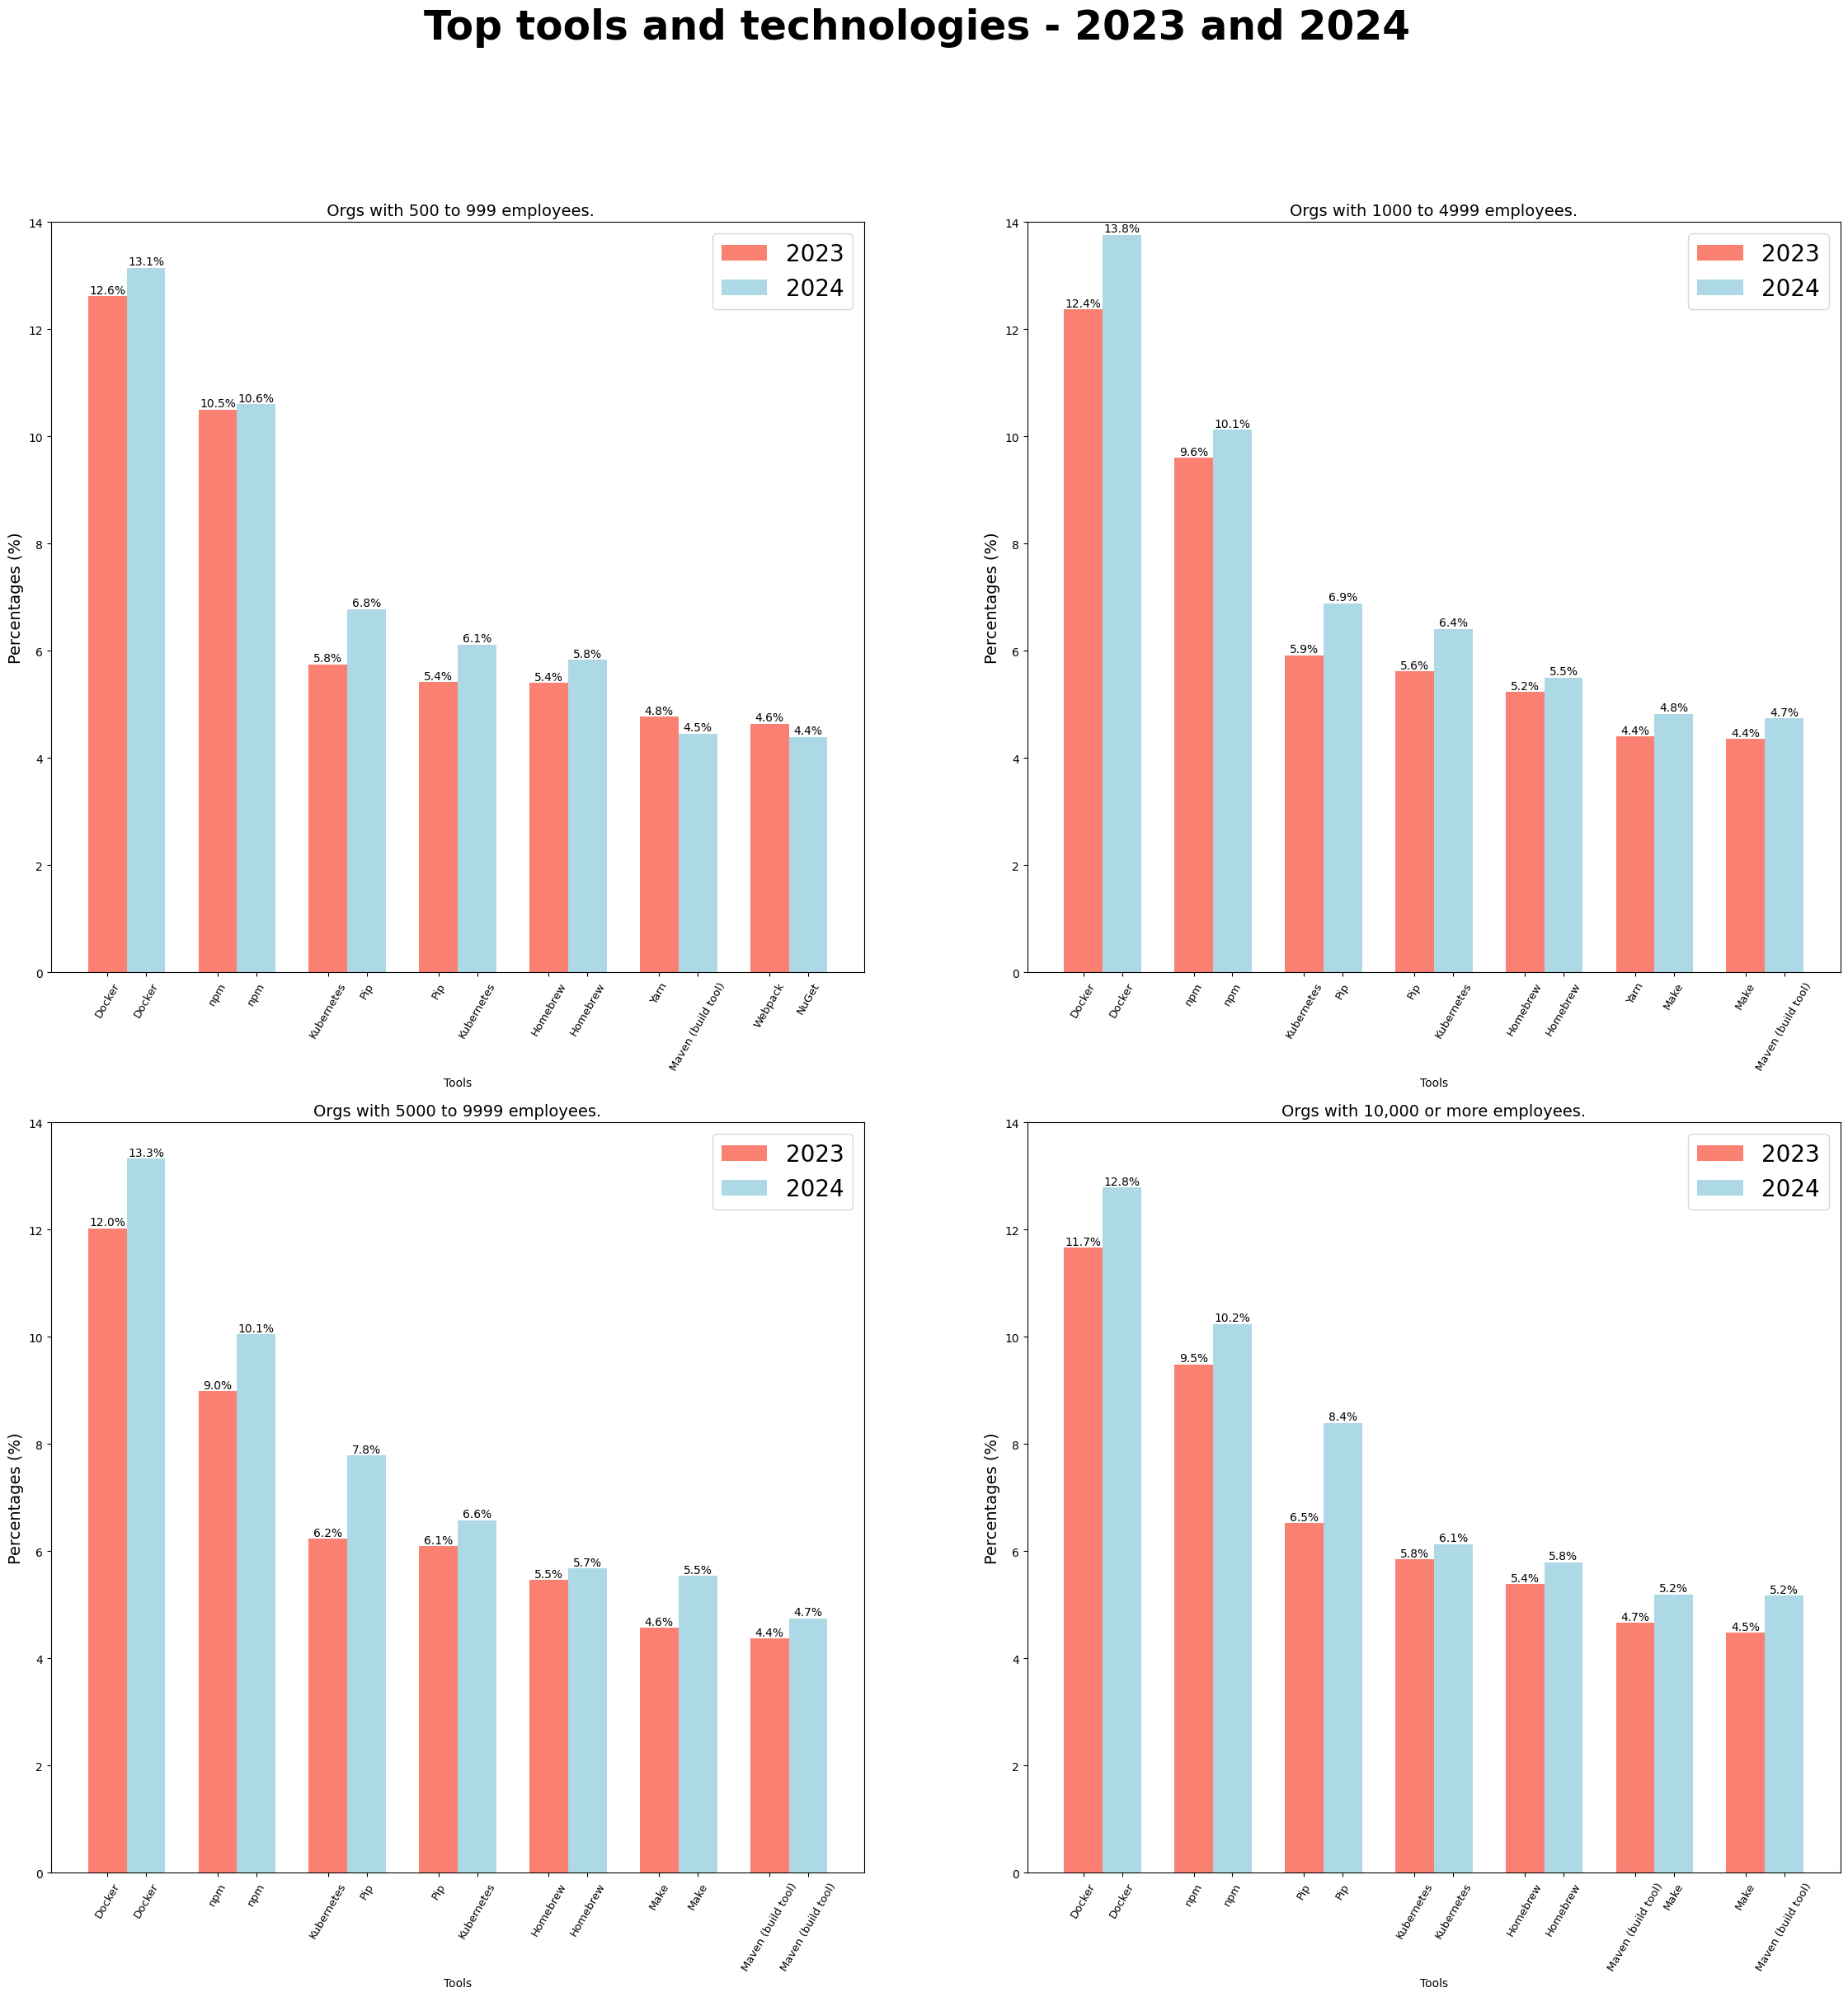

In [ ]:
import matplotlib.cm as cm
#Plot to show which tools are used the most among organizations of various sizes.
fig, axes = plt.subplots(2, 2, figsize=(28, 26))

# Define the width of the bars
bar_width = 0.35

# Define the top 7 x data for the group
x_2023 = np.arange(0, 7)
x_2024 = np.arange(0, 7)


#Plot for org size with 500-999 employees
bars_2023 = axes[0,0].bar(x_2023 - bar_width/2,
            height=data2023_tools_using_expanded_by_org[data2023_tools_using_expanded_by_org['OrgSize']=='500 to 999 employees']['percentage'].values[0:7],
              width=bar_width,
              color='salmon',
              label='2023')

bars_2024 = axes[0,0].bar(x_2024 + bar_width/2,
            height=data2024_tools_using_expanded_by_org[data2024_tools_using_expanded_by_org['OrgSize']=='500 to 999 employees']['percentage'].values[0:7],
              width=bar_width,
              color='lightblue',
              label='2024')

axes[0,0].set_title(' Orgs with 500 to 999 employees.', fontsize=14)
axes[0,0].set_xlabel('Tools', fontsize=10)
axes[0,0].set_ylabel('Percentages (%)', fontsize=14)
axes[0,0].set_ylim(0, 14)

# Set xticks and xticklabels for 2023 and 2024 separately
xticks_combined = np.array([-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175,
        3.825, 4.175, 4.825, 5.175, 5.825, 6.175])
axes[0,0].set_xticks(xticks_combined)

# Concatenate both labels with spaces between to differentiate 2023 and 2024 languages
xtick_labels_2023 = data2023_tools_using_expanded_by_org[data2023_tools_using_expanded_by_org['OrgSize']=='500 to 999 employees']['ToolsTechHaveWorkedWith'][0:7]
xtick_labels_2024 = data2024_tools_using_expanded_by_org[data2024_tools_using_expanded_by_org['OrgSize']=='500 to 999 employees']['ToolsTechHaveWorkedWith'][0:7]

# Assign the labels for 2023 and 2024 separately to ensure correct alignment
combined_labels = []
for label_2023, label_2024 in zip(xtick_labels_2023, xtick_labels_2024):
    combined_labels.append(label_2023)
    combined_labels.append(label_2024)
axes[0,0].set_xticklabels(combined_labels, rotation=60, ha='center', fontsize=9.5)

# Add labels to each bar
for bar in bars_2023:
    axes[0,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_2024:
    axes[0,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

axes[0,0].legend(fontsize=20)


#Plot for org size with 1000 to 4999 employees

bars_2023 = axes[0,1].bar(x_2023 - bar_width/2,
            height=data2023_tools_using_expanded_by_org[data2023_tools_using_expanded_by_org['OrgSize']=='1,000 to 4,999 employees']['percentage'].values[0:7],
              width=bar_width,
              color='salmon',
              label='2023')

bars_2024 = axes[0,1].bar(x_2024 + bar_width/2,
            height=data2024_tools_using_expanded_by_org[data2024_tools_using_expanded_by_org['OrgSize']=='1,000 to 4,999 employees']['percentage'].values[0:7],
              width=bar_width,
              color='lightblue',
              label='2024')

axes[0,1].set_title('Orgs with 1000 to 4999 employees.', fontsize=14)
axes[0,1].set_xlabel('Tools', fontsize=10)
axes[0,1].set_ylabel('Percentages (%)', fontsize=14)
axes[0,1].set_ylim(0, 14)

# Set xticks and xticklabels for 2023 and 2024 separately
xticks_combined = np.array([-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175,
        3.825, 4.175, 4.825, 5.175, 5.825, 6.175])
axes[0,1].set_xticks(xticks_combined)

# Concatenate both labels with spaces between to differentiate 2023 and 2024 tools
xtick_labels_2023 = data2023_tools_using_expanded_by_org[data2023_tools_using_expanded_by_org['OrgSize']=='1,000 to 4,999 employees']['ToolsTechHaveWorkedWith'][0:7]
xtick_labels_2024 = data2024_tools_using_expanded_by_org[data2024_tools_using_expanded_by_org['OrgSize']=='1,000 to 4,999 employees']['ToolsTechHaveWorkedWith'][0:7]

# Assign the labels for 2023 and 2024 separately to ensure correct alignment
combined_labels = []
for label_2023, label_2024 in zip(xtick_labels_2023, xtick_labels_2024):
    combined_labels.append(label_2023)
    combined_labels.append(label_2024)
axes[0,1].set_xticklabels(combined_labels, rotation=60, ha='center', fontsize=9.5)

# Add labels to each bar
for bar in bars_2023:
    axes[0,1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_2024:
    axes[0,1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

axes[0,1].legend(fontsize=20)


#Plot for org size with 5000 to 9999 employees

bars_2023 = axes[1,0].bar(x_2023 - bar_width/2,
            height=data2023_tools_using_expanded_by_org[data2023_tools_using_expanded_by_org['OrgSize']=='5,000 to 9,999 employees']['percentage'].values[0:7],
              width=bar_width,
              color='salmon',
              label='2023')

bars_2024 = axes[1,0].bar(x_2024 + bar_width/2,
            height=data2024_tools_using_expanded_by_org[data2024_tools_using_expanded_by_org['OrgSize']=='5,000 to 9,999 employees']['percentage'].values[0:7],
              width=bar_width,
              color='lightblue',
              label='2024')

axes[1,0].set_title('Orgs with 5000 to 9999 employees.', fontsize=14)
axes[1,0].set_xlabel('Tools', fontsize=10)
axes[1,0].set_ylabel('Percentages (%)', fontsize=14)
axes[1,0].set_ylim(0, 14)

# Set xticks and xticklabels for 2023 and 2024 separately
xticks_combined = np.array([-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175,
        3.825, 4.175, 4.825, 5.175, 5.825, 6.175])
axes[1,0].set_xticks(xticks_combined)

# Concatenate both labels with spaces between to differentiate 2023 and 2024 tools
xtick_labels_2023 = data2023_tools_using_expanded_by_org[data2023_tools_using_expanded_by_org['OrgSize']=='5,000 to 9,999 employees']['ToolsTechHaveWorkedWith'][0:7]
xtick_labels_2024 = data2024_tools_using_expanded_by_org[data2024_tools_using_expanded_by_org['OrgSize']=='5,000 to 9,999 employees']['ToolsTechHaveWorkedWith'][0:7]

# Assign the labels for 2023 and 2024 separately to ensure correct alignment
combined_labels = []
for label_2023, label_2024 in zip(xtick_labels_2023, xtick_labels_2024):
    combined_labels.append(label_2023)
    combined_labels.append(label_2024)
axes[1,0].set_xticklabels(combined_labels, rotation=60, ha='center', fontsize=9.5)

# Add labels to each bar
for bar in bars_2023:
    axes[1,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_2024:
    axes[1,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

axes[1,0].legend(fontsize=20)


#Plot for the orgs with '10,000 or more employees

bars_2023 = axes[1,1].bar(x_2023 - bar_width/2,
            height=data2023_tools_using_expanded_by_org[data2023_tools_using_expanded_by_org['OrgSize']=='10,000 or more employees']['percentage'].values[0:7],
              width=bar_width,
              color='salmon',
              label='2023')

bars_2024 = axes[1,1].bar(x_2024 + bar_width/2,
            height=data2024_tools_using_expanded_by_org[data2024_tools_using_expanded_by_org['OrgSize']=='10,000 or more employees']['percentage'].values[0:7],
              width=bar_width,
              color='lightblue',
              label='2024')

axes[1,1].set_title('Orgs with 10,000 or more employees.', fontsize=14)
axes[1,1].set_xlabel('Tools', fontsize=10)
axes[1,1].set_ylabel('Percentages (%)', fontsize=14)
axes[1,1].set_ylim(0, 14)

# Set xticks and xticklabels for 2023 and 2024 separately
xticks_combined = np.array([-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175,
        3.825, 4.175, 4.825, 5.175, 5.825, 6.175])
axes[1,1].set_xticks(xticks_combined)

# Concatenate both labels with spaces between to differentiate 2023 and 2024 tools
xtick_labels_2023 = data2023_tools_using_expanded_by_org[data2023_tools_using_expanded_by_org['OrgSize']=='10,000 or more employees']['ToolsTechHaveWorkedWith'][0:7]
xtick_labels_2024 = data2024_tools_using_expanded_by_org[data2024_tools_using_expanded_by_org['OrgSize']=='10,000 or more employees']['ToolsTechHaveWorkedWith'][0:7]

# Assign the labels for 2023 and 2024 separately to ensure correct alignment
combined_labels = []
for label_2023, label_2024 in zip(xtick_labels_2023, xtick_labels_2024):
    combined_labels.append(label_2023)
    combined_labels.append(label_2024)
axes[1,1].set_xticklabels(combined_labels, rotation=60, ha='center', fontsize=9.5)

# Add labels to each bar
for bar in bars_2023:
    axes[1,1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

for bar in bars_2024:
    axes[1,1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                    f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

axes[1,1].legend(fontsize=20)

plt.suptitle('Top tools and technologies - 2023 and 2024', fontsize=35, fontweight='bold')
plt.show()


*The data reveals that while certain tools, such as Docker and npm, maintain high popularity across different organization sizes , there are slight shifts in preferences from 2023 to 2024. For organizations with 500 to 999 employees php has replaced kubernetes as the third most popular tool, this trend holds true in organizations with 1000 to 4999 employees as well as in organizations with 5000 to 9999 employees indicating an increase in php popularity.*

**Database Usage Trends and Insights**

This method processes the 'DatabaseHaveWorkedWith' column by first splitting multiple databases into individual entries using the semicolon separator, and then expanding the dataset to ensure each database is represented in its own row. The data is then grouped by 'DatabaseHaveWorkedWith' to count the occurrences of each database.

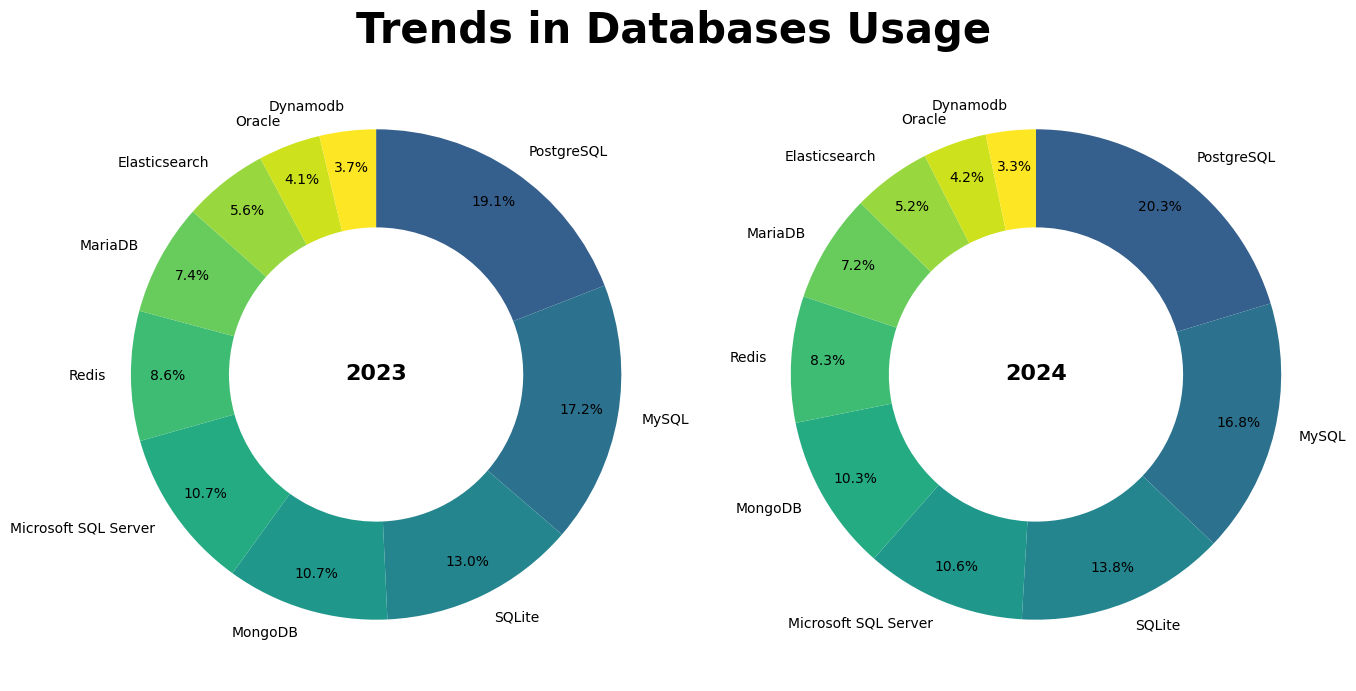

In [ ]:
import matplotlib.cm as cm

# Filter the 2023 data to include only the 'ResponseId' and 'DatabaseHaveWorkedWith' columns
data2023_Database_using = data2023[['ResponseId', 'DatabaseHaveWorkedWith']]

# Remove rows where 'DatabaseHaveWorkedWith' contains missing values
data2023_Database_using = data2023_Database_using.dropna(subset=['DatabaseHaveWorkedWith'])

# Do the same filtering for the 2024 data, focusing on the same columns
data2024_Database_using = data2024[['ResponseId', 'DatabaseHaveWorkedWith']]

# Remove rows where 'DatabaseHaveWorkedWith' contains missing values for 2024
data2024_Database_using = data2024_Database_using.dropna(subset=['DatabaseHaveWorkedWith'])

# Function to split databases that are stored as a semicolon-separated string into individual rows
def split_Database_using(df):
    rows = []
    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        # Split the 'DatabaseHaveWorkedWith' column by semicolons
        Database = row['DatabaseHaveWorkedWith'].split(';')
        # For each split database, create a new row with the same 'ResponseId' and the individual database
        for Database in Database:
            rows.append({
                'ResponseId': row['ResponseId'],
                'DatabaseHaveWorkedWith': Database.strip()  # Remove any extra spaces
            })
    # Return the new DataFrame containing individual rows for each database
    return pd.DataFrame(rows)

# Apply the split function to the 2023 data and reset the index
data2023_Database_using_expanded = split_Database_using(data2023_Database_using).reset_index()

# Apply the split function to the 2024 data and reset the index
data2024_Database_using_expanded = split_Database_using(data2024_Database_using).reset_index()

# Rename the 'index' column to 'counts' in the 2023 expanded data
data2023_Database_using_expanded = data2023_Database_using_expanded.rename(columns={'index': 'counts'})

# Group by 'DatabaseHaveWorkedWith' for the 2023 data, count occurrences, and sort in descending order
data2023_Database_using_expanded = data2023_Database_using_expanded.groupby('DatabaseHaveWorkedWith')['counts'].count().sort_values(ascending=False).reset_index()

# Rename the 'index' column to 'counts' in the 2024 expanded data
data2024_Database_using_expanded = data2024_Database_using_expanded.rename(columns={'index': 'counts'})

# Group by 'DatabaseHaveWorkedWith' for the 2024 data, count occurrences, and sort in descending order
data2024_Database_using_expanded = data2024_Database_using_expanded.groupby('DatabaseHaveWorkedWith')['counts'].count().sort_values(ascending=False).reset_index()

# Prepare the top 10 databases and their corresponding counts for 2023
labels_2023 = data2023_Database_using_expanded['DatabaseHaveWorkedWith'][0:10]
sizes_2023 = data2023_Database_using_expanded['counts'][0:10].values
colors_2023 = cm.viridis(np.linspace(0.3, 1, 10))  # Generate colors for each slice of the donut chart

# Prepare the top 10 databases and their corresponding counts for 2024
labels_2024 = data2024_Database_using_expanded['DatabaseHaveWorkedWith'][0:10]
sizes_2024 = data2024_Database_using_expanded['counts'][0:10].values
colors_2024 = cm.viridis(np.linspace(0.3, 1, 10))  # Generate colors for each slice of the donut chart

# Create a subplot with 1 row and 2 columns to place the charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Create a donut chart for the 2023 data
ax1.pie(sizes_2023, labels=labels_2023, colors=colors_2023, wedgeprops={'width': 0.4}, startangle=90, counterclock=False, autopct='%1.1f%%',
        pctdistance=0.85)
ax1.text(0, 0, '2023', horizontalalignment='center', verticalalignment='center', fontsize=16, fontweight='bold')  # Title inside donut
ax1.set_aspect('equal')  # Ensure the chart is drawn as a circle

# Create a donut chart for the 2024 data
ax2.pie(sizes_2024, labels=labels_2024, colors=colors_2024, wedgeprops={'width': 0.4}, startangle=90, counterclock=False, autopct='%1.1f%%',
        pctdistance=0.85)
ax2.text(0, 0, '2024', horizontalalignment='center', verticalalignment='center', fontsize=16, fontweight='bold')  # Title inside donut

ax2.set_aspect('equal')  # Ensure the chart is drawn as a circle

# Set the main title for both charts
plt.suptitle('Trends in Databases Usage', fontsize=30, fontweight='bold')

# Automatically adjust the spacing to prevent overlapping of subplots
plt.tight_layout()

# Display the charts
plt.show()


*The image compares the trends in database usage between 2023 and 2024, based on survey data. In both years, popular databases such as PostgreSQL, MySQL, and SQLite maintain strong usage across the board, highlighting their continued relevance in the developer community. In 2023, databases like MongoDB, Microsoft SQL Server, and Redis are also widely used, with databases such as Elasticsearch and MariaDB showing notable growth in usage. By 2024, similar databases remain popular, with rankings shifting slightly, showing a consistent preference for established technologies. DynamoDB and Oracle retain a smaller but steady presence in both years.*


##**Leading Platforms and Frameworks across Industries**

**Which platforms were predominantly utilized by the IT sector in 2023?**

Function to split the PlatformHaveWorkedWith column to analyse the different AI used over the years 2023 and 2024. Result is stored in data frames called data2023_platforms and data2024_platforms with ResponseId, Age, PlatformHaveWorkedWith, Industry, OrgSize,and DevType.

In [ ]:
def split_platforms(df):
    rows = []
    for _, row in df.iterrows():
        # Split the column 'PlatformHaveWorkedWith' if it's not NaN
        if pd.notna(row['PlatformHaveWorkedWith']):
            platforms = row['PlatformHaveWorkedWith'].split(';')
            # Create a new list for every AI tool after splitting them
            for tool in platforms:
                rows.append({
                    'ResponseId': row['ResponseId'],
                    'Age': row['Age'],
                    'PlatformHaveWorkedWith': tool.strip(),
                    'Industry': row['Industry'],  # Include other relevant columns as needed
                    'DevType': row['DevType'],
                    'OrgSize': row['OrgSize']
                })
    # Return expanded DataFrame
    return pd.DataFrame(rows)

# Use the function to split and expand the dataframe.
data2023_platforms = split_platforms(data2023).reset_index(drop=True)
data2024_platforms = split_platforms(data2024).reset_index(drop=True)

# Show the results.
data2023_platforms
data2024_platforms

,ResponseId,Age,PlatformHaveWorkedWith,Industry,DevType,OrgSize
0,2,35-44 years old,Amazon Web Services (AWS),NaN,"Developer, full-stack",NaN
1,2,35-44 years old,Heroku,NaN,"Developer, full-stack",NaN
2,2,35-44 years old,Netlify,NaN,"Developer, full-stack",NaN
3,3,45-54 years old,Google Cloud,NaN,Developer Experience,NaN
4,4,18-24 years old,Amazon Web Services (AWS),NaN,"Developer, full-stack",NaN
...,...,...,...,...,...,...
99340,65437,18-24 years old,Amazon Web Services (AWS),NaN,NaN,NaN
99341,65437,18-24 years old,Cloudflare,NaN,NaN,NaN
99342,65437,18-24 years old,Google Cloud,NaN,NaN,NaN
99343,65437,18-24 years old,Netlify,NaN,NaN,NaN


This code segment evaluates the distribution of software platforms utilized within the IT industry in 2023 by filtering the dataset for relevant industries, quantifying the frequency of platform usage, and subsequently visualizing the findings through a pie chart representation.


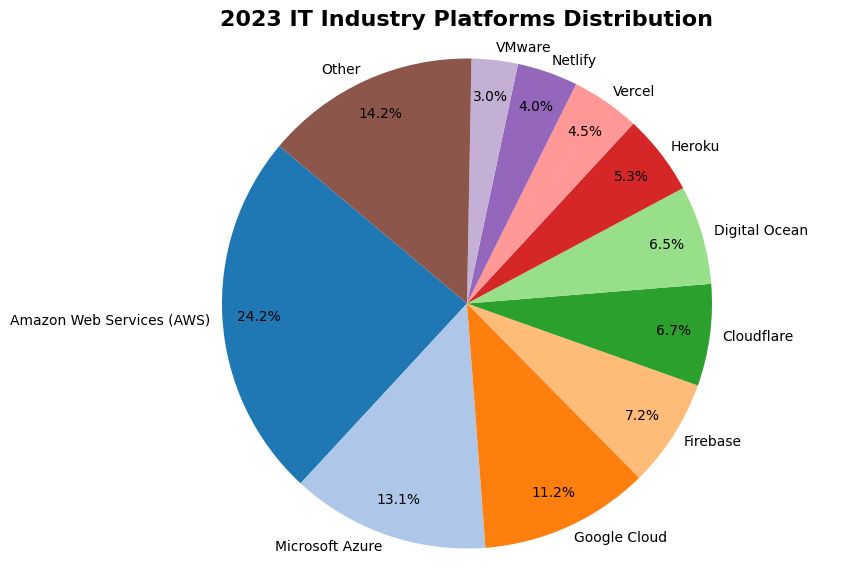

In [ ]:
selected_industries = ['Information Services, IT, Software Development, or other Technology']

# Get platform counts
top_platform_counts23 = data2023_platforms['PlatformHaveWorkedWith'].value_counts()

# Filter for specific industries
data2023_top_platforms_selected_industries = data2023_platforms[
    data2023_platforms['Industry'].isin(selected_industries)
]

# Group by PlatformHaveWorkedWith and count occurrences
grouped_data = data2023_top_platforms_selected_industries['PlatformHaveWorkedWith'].value_counts()

# Define the number of top platforms to show
top_n = 10

# Separate top platforms and combine others into "Other"
if len(grouped_data) > top_n:
    top_platforms = grouped_data.head(top_n)
    other_platforms_count = grouped_data.iloc[top_n:].sum()
    # Add "Other" category
    top_platforms['Other'] = other_platforms_count
else:
    top_platforms = grouped_data

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_platforms,
        labels=top_platforms.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab20.colors,
        labeldistance=1.05,   # Move labels slightly closer to the pie chart
        pctdistance=0.85)
plt.title('2023 IT Industry Platforms Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

*The pie chart depicts the distribution of platforms used in the IT industry in 2023. Amazon Web Services (AWS) dominates the landscape with 24.2% of the market share, followed by Microsoft Azure at 13.1% and Google Cloud at 11.2%. Other platforms, such as Firebase (7.2%) and Cloudflare (6.7%), also hold notable shares. Smaller players like Heroku, Vercel, and VMware make up the rest of the market, collectively accounting for a smaller portion of platform usage. This data highlights AWS's strong foothold and the competitive landscape among cloud service providers.*

**Which Are the Top 10 Web Development Frameworks in 2024?**

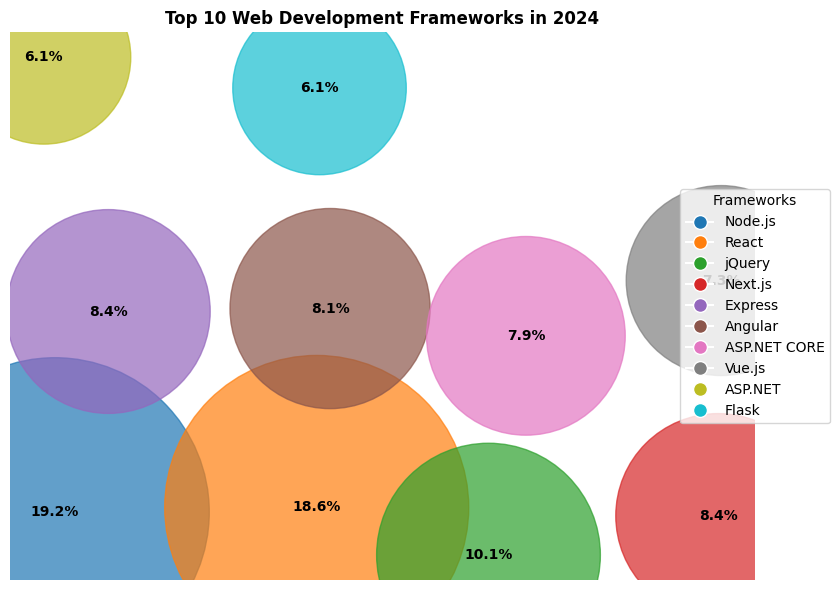

In [ ]:
# Step 1: Split the web development frameworks
def split_webdev_frameworks(df):
    rows = []
    for _, row in df.iterrows():
        if pd.notna(row['WebframeHaveWorkedWith']):
            frameworks = row['WebframeHaveWorkedWith'].split(';')
            for framework in frameworks:
                rows.append({
                    'ResponseId': row['ResponseId'],
                    'WebframeHaveWorkedWith': framework.strip()
                })
    return pd.DataFrame(rows)

# Call function to split values
expanded_df2024 = split_webdev_frameworks(df2024)
framework_counts = expanded_df2024['WebframeHaveWorkedWith'].value_counts()

# Create bubble_data DataFrame and keep only the top 10 frameworks
bubble_data = pd.DataFrame({
    'WebframeHaveWorkedWith': framework_counts.index,
    'Count': framework_counts.values
})

# Filter to keep only the top 10 frameworks
top_10_bubble_data = bubble_data.nlargest(10, 'Count')

# Calculate total responses for percentage calculation
total_responses = top_10_bubble_data['Count'].sum()

# Size of bubbles
top_10_bubble_data['Size'] = top_10_bubble_data['Count'] * 2.5  # Increased scaling factor for larger bubbles

# Color map for bubbles
colors = plt.cm.tab10(np.arange(len(top_10_bubble_data)))  # Use a colormap with distinct colors

plt.figure(figsize=(10, 6))  # Adjust the figure size for better fit

# Arrange bubbles on a grid with a scaling factor to distribute them across the plot area
grid_size = int(np.ceil(np.sqrt(len(top_10_bubble_data))))  # Square grid
x_positions = []
y_positions = []

# Generate grid positions with a larger random offset range for better distribution
for i in range(len(top_10_bubble_data)):
    row = i // grid_size
    col = i % grid_size
    # Scale positions to occupy the full plot range and randomize positions
    x_positions.append((col + np.random.rand() * 0.4) / grid_size)  # Offset within each cell
    y_positions.append((row + np.random.rand() * 0.4) / grid_size)

# Normalize to spread across the plot area more evenly
x_positions = np.array(x_positions) * (grid_size / (grid_size + 0.7))
y_positions = np.array(y_positions) * (grid_size / (grid_size + 0.7))

# Create the scatter plot
plt.scatter(x_positions, y_positions, s=top_10_bubble_data['Size'], alpha=0.7, color=colors)
plt.title('Top 10 Web Development Frameworks in 2024', fontweight = 'bold', loc= 'center')
plt.axis('off')

# Legend placed outside plot area
handles = [plt.Line2D([0], [0], marker='o', color='w', label=fw,
                       markersize=10, markerfacecolor=colors[i]) for i, fw in enumerate(top_10_bubble_data['WebframeHaveWorkedWith'])]
plt.legend(title='Frameworks', handles=handles, loc='center', bbox_to_anchor=(1, 0.5))

# Annotate each bubble with the percentage
for i, row in top_10_bubble_data.iterrows():
    percentage = (row['Count'] / total_responses) * 100
    plt.annotate(f"{percentage:.1f}%",
                 (x_positions[i], y_positions[i]),
                 color='black',
                 weight='bold',
                 fontsize=10,
                 ha='center',
                 va='center')

# Adjust layout to ensure nothing overlaps
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave room for legend on the right
plt.show()


*The bubble chart indicates that React and Node.js are the two most popular frameworks, with signifcicant usage shares of 18.5% and 18.3%, respectively. This aligns with industry trends that favor these frameworks for their versatility in front-end and back-end development. Frameworks like jQuery, Angular, ASP.NET CORE, and Next.js also show strong popularity, which suggests that there's still demand for developers skilled in these technologies. For job seekers, prioritizing Reach and Node.js skills could enhance employability, as they are evidently in high demand. However, learning secondary frameworks like Angular and Vue.js could provide an endge in niche markets or in companies using a diverse tech stacks.*

##**Geographical Distribution of Respondents**

This visualization presents the geographical distribution of respondents from the 2023 and 2024 datasets, highlighting the concentration of participation from different countries. It provides insights into the regional representation of individuals in the study, with a toggle option to compare data from both years.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Prepare the 2023 data
country_counts_2023 = data2023['Country'].value_counts().reset_index()
country_counts_2023.columns = ['Country', 'Count']

# Prepare the 2024 data
country_counts_2024 = data2024['Country'].value_counts().reset_index()
country_counts_2024.columns = ['Country', 'Count']

# Create the base figure using 2023 data
fig = px.choropleth(country_counts_2023,
                    locations='Country',
                    locationmode='country names',
                    color='Count',
                    hover_name='Country',
                    color_continuous_scale='Blues',
                    projection='natural earth')


fig.update_layout(
    title={
        'text': 'Country Distribution in Data 2023 and 2024',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial Black', 'color': 'black' },
    },
    updatemenus=[{
        'buttons': [
            {
                'args': [{'z': [country_counts_2023['Count']]}],
                'label': '2023',
                'method': 'restyle'
            },
            {
                'args': [{'z': [country_counts_2024['Count']]}],
                'label': '2024',
                'method': 'restyle'
            }
        ],
        'direction': 'down',
        'showactive': True,
        'x': 1.25,
        'xanchor': 'right',
        'y': 1.15,
        'yanchor': 'top'
    }]
)

# Show the plot
fig.show()


*By analyzing the country distribution from 2023 and 2024, we can observe shifts or trends in participation across regions, offering valuable context for understanding the global reach of the data and its implications on the broader analysis.*

##**Compensation Analysis**

**Average Salaries by Employment Type for the year 2024**

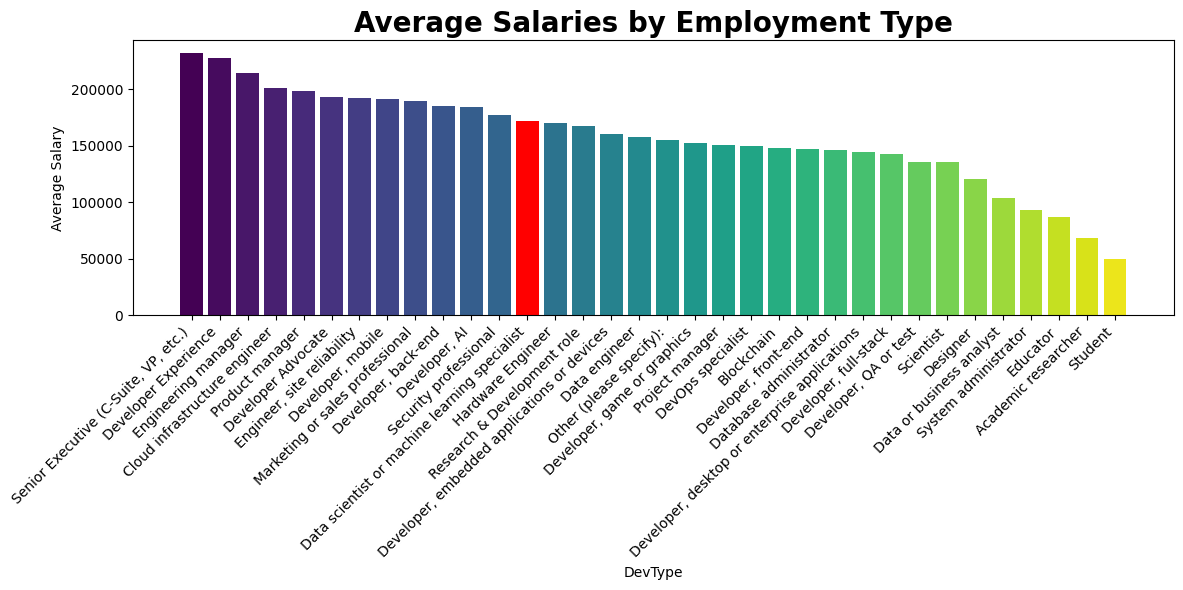

In [ ]:
# Filter for USA data and non-null compensation values
data_USA = df2024[df2024["Country"] == "United States of America"]
data_USA_compensation = data_USA[data_USA['Currency'].notna() & data_USA['CompTotal'].notna()]

# Filter out outliers
threshold = np.percentile(data_USA_compensation['CompTotal'], 99)
data_USA_compensation_filtered = data_USA_compensation[data_USA_compensation['CompTotal'] < threshold]

# Recalculate average salaries without the outliers
average_salaries_filtered = data_USA_compensation_filtered.groupby('DevType')['CompTotal'].mean()
average_salaries_filtered = average_salaries_filtered.sort_values(ascending=False)

# Normalize color range (darker at the top, lighter at the bottom)
norm = plt.Normalize(0, len(average_salaries_filtered))
colors = plt.cm.viridis(norm(range(len(average_salaries_filtered))))

# Highlight color for Data Scientist
highlight_color = 'red'  # Change this to any color you prefer
highlight_index = average_salaries_filtered.index.get_loc('Data scientist or machine learning specialist')  # Get the index for "Data Scientist"

# Create the color array for the bars, changing the highlighted bar's color
colors = [highlight_color if i == highlight_index else color for i, color in enumerate(colors)]

# Plot with filtered data and gradient color
plt.figure(figsize=(12, 6))
bars = plt.bar(average_salaries_filtered.index, average_salaries_filtered.values, color=colors)

# Customize plot
plt.xlabel("DevType")
plt.ylabel("Average Salary")
plt.title("Average Salaries by Employment Type", fontweight='bold', fontsize = 20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()


*The highest-paying tech roles are Senior Executives, AI Developers, and Engineering Managers, with average salaries around or above 200,000 dollars, reflecting the premium on leadership and specialized technical expertise. In contrast, roles like Front-end Developers, QA Testers, and Business Analysts tend to earn significantly less, around 90,000 dollars to 110,000 dollars, while entry-level and academic roles have the lowest average salaries.*

**Median Salary by Programming Languages**

In this part, we try to investigate the relationship between programming languages and compensations. With this analysis, we hope to see which skills are more valuable in the job market.

In this analysis, there are two major challenges.

First of all, it is hard to compare salaries between different countries since salary levels vary across countries. Therefore, we focus on jobs in the US for the comparation.

Secondly, There are various units for calculating salaries, and it is
relatively difficult to have a reasonable basis for comparison after converting using exchange rates. Consequently, we first look at the data to see how many data are using different currencies.

In [ ]:
#Slicing the data to jobs in the US
data2023_US = data2023_targeted_employment_without_students[data2023_targeted_employment_without_students['Country']=='United States of America']
data2024_US = data2024_targeted_employment_without_students[data2024_targeted_employment_without_students['Country']=='United States of America']

data2023_US.loc[:,'Currency'].unique()
data2024_US.loc[:,'Currency'].unique()

data2023_US.groupby('Currency')['LanguageHaveWorkedWith'].count()
data2024_US.groupby('Currency')['LanguageHaveWorkedWith'].count()

,LanguageHaveWorkedWith
Currency,
AED United Arab Emirates dirham,4
ALL\tAlbanian lek,1
AMD\tArmenian dram,2
BTN\tBhutanese ngultrum,1
CZK\tCzech koruna,1
DZD\tAlgerian dinar,1
INR\tIndian rupee,1
UGX\tUgandan shilling,3
USD\tUnited States dollar,6359


After looking at the data, we found that the amount of data which are using different currencies are very small. They might not have a great influence to our analysis. Therefore, in order to simplify the analysis, we decide to drop those data.

In [ ]:
data2023_US = data2023_US[data2023_US['Currency'] == 'USD\tUnited States dollar']
data2024_US = data2024_US[data2024_US['Currency'] == 'USD\tUnited States dollar']

compensation_list = ['ResponseId', 'Age', 'Employment', 'CompTotal', 'LanguageHaveWorkedWith']
data2023_US_comp = data2023_US[compensation_list]
data2024_US_comp = data2024_US[compensation_list]

After that, we drop the missing values for columns 'LanguageHaveWorkedWith', 'CompTotal'.

In [ ]:
data2023_US_comp.isnull().sum()
data2024_US_comp.isnull().sum()

,0
ResponseId,0
Age,0
Employment,0
CompTotal,1209
LanguageHaveWorkedWith,82


In [ ]:
#Drop the missing values for column 'LanguageHaveWorkedWith', 'CompTotal'.
data2023_US_comp = data2023_US_comp.dropna(subset=['LanguageHaveWorkedWith','CompTotal'], how='any')
data2023_US_comp


#Do the same thing for data in 2024
data2024_US_comp = data2024_US_comp.dropna(subset=['LanguageHaveWorkedWith','CompTotal'], how='any')
data2024_US_comp

,ResponseId,Age,Employment,CompTotal,LanguageHaveWorkedWith
389,390,25-34 years old,"Employed, full-time;Student, part-time",110000.0,HTML/CSS;JavaScript;Python;SQL;TypeScript
398,399,45-54 years old,"Employed, full-time",195000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...
428,429,25-34 years old,"Employed, full-time",230000.0,Bash/Shell (all shells);Go;Python;Rust
432,433,35-44 years old,"Employed, full-time",160000.0,C#;Go;HTML/CSS;JavaScript;SQL;TypeScript
442,443,35-44 years old,"Employed, full-time",190000.0,C#;HTML/CSS;Java;JavaScript;Python
...,...,...,...,...,...
65105,65106,25-34 years old,"Employed, full-time",155000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Ty...
65132,65133,35-44 years old,"Employed, full-time",240000.0,Bash/Shell (all shells);C;Dart;Go;HTML/CSS;Jav...
65241,65242,25-34 years old,"Employed, full-time",185000.0,Kotlin
65261,65262,18-24 years old,"Employed, full-time",40000.0,HTML/CSS;JavaScript;Python;SQL;TypeScript


However, there are still something to do. When comparing salaries, we usually want to look at annual salaries and specifically focus on the pay for full-time positions. Therefore, we slice the data to people who are full-time employment.

In [ ]:
data2023_US_comp['Employment'].unique()
data2024_US_comp['Employment'].unique()

array(['Employed, full-time;Student, part-time', 'Employed, full-time',
       'Employed, full-time;Student, full-time',
       'Not employed, but looking for work',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Retired',
       'Not employed, but looking for work;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or se

In [ ]:
filter_comp_2023 = data2023_US_comp['Employment'].str.contains('Employed, full-time')
data2023_US_comp = data2023_US_comp[filter_comp_2023]

filter_comp_2024 = data2024_US_comp['Employment'].str.contains('Employed, full-time')
data2024_US_comp = data2024_US_comp[filter_comp_2024]

In [ ]:
data_US_comp_describe = pd.concat([data2023_US_comp['CompTotal'].describe(), data2024_US_comp['CompTotal'].describe()], axis=1)
data_US_comp_describe.columns = ['2023', '2024']
data_US_comp_describe.style.format("{:,.0f}")

,2023,2024
count,"10,437","4,852"
mean,"958,129,902,102","419,288"
std,"97,884,101,402,256","17,686,836"
min,0,0
25%,"110,000","105,000"
50%,"150,000","148,535"
75%,"200,000","200,000"
max,"10,000,000,000,000,000","1,232,142,154"


We found that there are some crazy outliers, so we go back to check if those compensations are truly exist and make sense.

For the criteria of outliers, we set the lower bound at compensations less than 20000, because it is unlikely for a full-time developer in the US to earn less than 20000 USD for a year. As for the upper bound, we first set it at 300000, and we found there are 3 data in 2023 and 1 in 2024.

For 2023 data, we choose to exclude only the ID 49554 because He claims his annual salary is 10^16, which is extremely unreasonable. For 2024 data, We drop the ID 5095, who claims his annual salary is more than 10^9.

In [ ]:
#Detect outliers
#Check for the extremely high salaries
high_salaries_2023_mask = data2023_US_comp[(data2023_US_comp['CompTotal'] > 3000000)]['ResponseId']
high_salaries_2023 = data2023[data2023['ResponseId'].isin(high_salaries_2023_mask)]

high_salaries_2024_mask = data2024_US_comp[(data2024_US_comp['CompTotal'] > 3000000)]['ResponseId']
high_salaries_2024 = data2024[data2024['ResponseId'].isin(high_salaries_2024_mask)]

#for 2023 data
outliers_2023 = data2023_US_comp[['ResponseId','CompTotal']][(data2023_US_comp['CompTotal'] < 20000) | (data2023_US_comp['CompTotal'] > 10000000)]
outliers_2023

outliers_2024 = data2024_US_comp[['ResponseId','CompTotal']][(data2024_US_comp['CompTotal'] < 20000) | (data2024_US_comp['CompTotal'] > 10000000)]
outliers_2024


,ResponseId,CompTotal
924,925,2.500000e+02
4572,4573,1.030000e+02
5094,5095,1.232142e+09
5523,5524,0.000000e+00
6083,6084,0.000000e+00
11483,11484,0.000000e+00
13544,13545,0.000000e+00
13549,13550,1.500000e+04
16532,16533,1.150000e+02
17616,17617,3.000000e+02


We then exclude outliers for our data.

In [ ]:
data2023_US_comp = data2023_US_comp[~data2023_US_comp['ResponseId'].isin(outliers_2023['ResponseId'])]
data2024_US_comp = data2024_US_comp[~data2024_US_comp['ResponseId'].isin(outliers_2024['ResponseId'])]

Same as previous analyses, we write a fuction to expand the column 'LanguageHaveWorkedWith'.

In [ ]:
def split_Language_comp(df):
    rows = []
    for _, row in df.iterrows():
        # Split the column 'LanguageHaveWorkedWith'.
        languages = row['LanguageHaveWorkedWith'].split(';')
        # Create a new list for every language after splitting them.
        for language in languages:
            rows.append({
                'ResponseId': row['ResponseId'],
                'Age': row['Age'],
                'Employment': row['Employment'],
                'CompTotal': row['CompTotal'],
                'LanguageHaveWorkedWith': language.strip()
            })
    # Return expanded DataFrame
    return pd.DataFrame(rows)

In [ ]:
data2023_US_comp_expanded = split_Language_comp(data2023_US_comp).reset_index()
data2023_US_comp_expanded


data2024_US_comp_expanded = split_Language_comp(data2024_US_comp).reset_index()
data2024_US_comp_expanded

,index,ResponseId,Age,Employment,CompTotal,LanguageHaveWorkedWith
0,0,390,25-34 years old,"Employed, full-time;Student, part-time",110000.0,HTML/CSS
1,1,390,25-34 years old,"Employed, full-time;Student, part-time",110000.0,JavaScript
2,2,390,25-34 years old,"Employed, full-time;Student, part-time",110000.0,Python
3,3,390,25-34 years old,"Employed, full-time;Student, part-time",110000.0,SQL
4,4,390,25-34 years old,"Employed, full-time;Student, part-time",110000.0,TypeScript
...,...,...,...,...,...,...
27240,27240,65262,18-24 years old,"Employed, full-time",40000.0,Python
27241,27241,65262,18-24 years old,"Employed, full-time",40000.0,SQL
27242,27242,65262,18-24 years old,"Employed, full-time",40000.0,TypeScript
27243,27243,65271,45-54 years old,"Employed, full-time",157000.0,C++


We first look at the medians of salaries for every programming languages in both 2023 and 2024.

In [ ]:
data2023_US_com_sorted = data2023_US_comp_expanded.groupby('LanguageHaveWorkedWith')['CompTotal'].agg('median').sort_values(ascending=False).apply(lambda x: f"{x:,.0f}")
data2024_US_com_sorted = data2024_US_comp_expanded.groupby('LanguageHaveWorkedWith')['CompTotal'].agg('median').sort_values(ascending=False).apply(lambda x: f"{x:,.0f}")
data_US_comp_merge = pd.merge(data2023_US_com_sorted, data2024_US_com_sorted, on='LanguageHaveWorkedWith', how='outer')

data_US_comp_merge = data_US_comp_merge.replace({',': ''}, regex=True)
data_US_comp_merge = data_US_comp_merge.apply(pd.to_numeric, errors='coerce')
data_US_comp_merge.columns = ['2023','2024']
data_US_comp_merge

,2023,2024
LanguageHaveWorkedWith,,
APL,94000.0,NaN
Ada,130000.0,100000.0
Apex,140500.0,140000.0
Assembly,150000.0,134000.0
Bash/Shell (all shells),155000.0,150000.0
C,150000.0,145487.0
C#,140000.0,133300.0
C++,150500.0,140000.0
Clojure,165500.0,180000.0


We noticed that there are some data only exist for 2023 or 2024. However, we do want to capture the information of those proogramming languages.

Since the salaries may not vary sharply within two consecutive years, we decided to fill the missing values in 2024 using the data from 2023, and similarly, fill the missing values in 2023 using the data from 2024.

In [ ]:
data_US_comp_merge_filled = data_US_comp_merge.ffill(axis=1)
data_US_comp_merge_filled.bfill(axis=1, inplace=True)
data_US_comp_merge_filled.sort_values(by='2024', ascending=False, inplace=True)
data_US_comp_merge_filled

,2023,2024
LanguageHaveWorkedWith,,
Flow,205000.0,205000.0
Scala,181000.0,200000.0
Erlang,182500.0,180000.0
Elixir,180000.0,180000.0
Clojure,165500.0,180000.0
F#,150000.0,175000.0
Objective-C,180000.0,174500.0
Ruby,170000.0,171000.0
Go,178500.0,170000.0


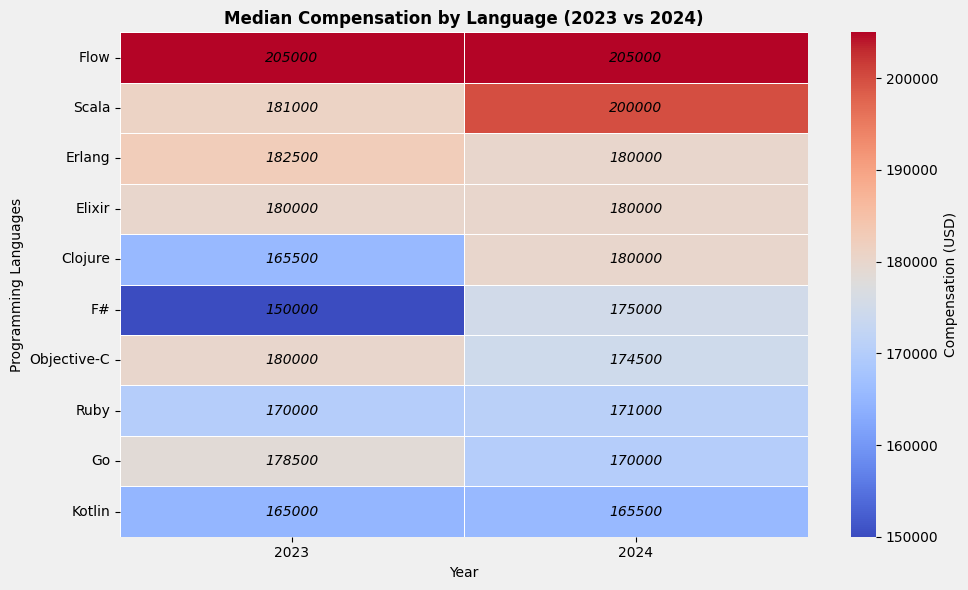

In [ ]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('#f0f0f0')
ax = sns.heatmap(data_US_comp_merge_filled[:10], annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5,
                 cbar_kws={'label': 'Compensation (USD)'},
                 annot_kws={"size": 10, "fontstyle": "italic", "color": "black"})
plt.title("Median Compensation by Language (2023 vs 2024)", fontsize=12, fontweight = 'bold')
plt.ylabel('Programming Languages')
plt.xlabel('Year')
plt.tight_layout()
#plt.savefig('Median Compensation for Programming Languages (2023 vs 2024).png', dpi=300, bbox_inches='tight')
plt.show()

 *In this part, we aim to identify which programming languages have relatively higher compensations. The heatmap indicates that 'Flow', 'Scala', and 'Erlang' have the top three median salaries among all programming languages.Interestingly, although these high-paying programming languages may not be familiar to many, this likely reflects their specialized nature and market scarcity*

##**Analysis Focused on MSBA students**

**Potential Job Roles & Skills for MSBA Students**

  In this part, we focus on potential job roles that MSBA students might pursue after graduation. Since we all are MSBA students, it would be crucial and interesting to see which skills are needed in industry. With the analyses, we could hone these skills and prepare for the job market.
  
  
  We include data analyst, business analyst, data scientise, and machine learning specialist in our analyses.

In [ ]:
data2023['DevType'].unique()

array([nan, 'Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional', 'Educator',
       'Research & Development role', 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Student',
       'Engineer, data', 'Hardware Engineer', 'Product manager',
       'Academic researcher', 'Developer, game or graphics',
       'Cloud infrastructure engineer', 'Engineering manager',
       'Developer Experience', 'Project manager', 'DevOps specialist',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Scientist', 'Marketing or sales professional'], dtype=object)

In [ ]:
#Drop the missing values for column 'LanguageHaveWorkedWith'
data2023_language_using_msba = data2023_language_using[(data2023_language_using['DevType']=='Data or business analyst')|(data2023_language_using['DevType']=='Data scientist or machine learning specialist')]
data2023_language_using_msba.shape

#Do the same thing for data in 2024
data2024_language_using_msba = data2024_language_using[(data2024_language_using['DevType']=='Data or business analyst')|(data2024_language_using['DevType']=='Data scientist or machine learning specialist')]

Cleaning data of potential MSBA job roles.

In [ ]:
#Drop the missing values for column 'LanguageHaveWorkedWith'
data2023_language_using_msba = data2023_language_using_msba.dropna(subset=['LanguageHaveWorkedWith'])
data2023_language_using_msba.shape


#Do the same thing for data in 2024
data2024_language_using_msba = data2024_language_using_msba.dropna(subset=['LanguageHaveWorkedWith'])
data2024_language_using_msba.shape

(941, 9)

In [ ]:
data2023_language_using_msba_expanded = split_Language_using(data2023_language_using_msba).reset_index()
data2024_language_using_msba_expanded = split_Language_using(data2024_language_using_msba).reset_index()

calculate the percentage of programming languages used for MSBA potential job roles in both years.

In [ ]:
#Create the dataframe for different ages, and see which programming skills are used the most among different ages.
data2023_language_using_msba_expanded_all_age = data2023_language_using_msba_expanded.rename(columns={'index': 'counts'})
data2023_language_using_msba_expanded_all_age = data2023_language_using_msba_expanded_all_age.groupby('LanguageHaveWorkedWith')['counts'].count().sort_values(ascending=False).reset_index()

# Calculate the total counts for every age levels to get the percentage for data in 2023
data2023_language_using_msba_expanded_all_age['total_counts'] = data2023_language_using_msba_expanded_all_age['counts'].sum()

#Calculate the percentage
data2023_language_using_msba_expanded_all_age['percentage'] = (data2023_language_using_msba_expanded_all_age['counts'] / data2023_language_using_msba_expanded_all_age['total_counts']) * 100


data2024_language_using_msba_expanded_all_age = data2024_language_using_msba_expanded.rename(columns={'index': 'counts'})
data2024_language_using_msba_expanded_all_age = data2024_language_using_msba_expanded_all_age.groupby('LanguageHaveWorkedWith')['counts'].count().sort_values(ascending=False).reset_index()

# Calculate the total counts for every age levels to get the percentage for data in 2023
data2024_language_using_msba_expanded_all_age['total_counts'] = data2024_language_using_msba_expanded_all_age['counts'].sum()

#Calculate the percentage
data2024_language_using_msba_expanded_all_age['percentage'] = (data2024_language_using_msba_expanded_all_age['counts'] / data2024_language_using_msba_expanded_all_age['total_counts']) * 100


Plotting the key programming languages for MSBA students

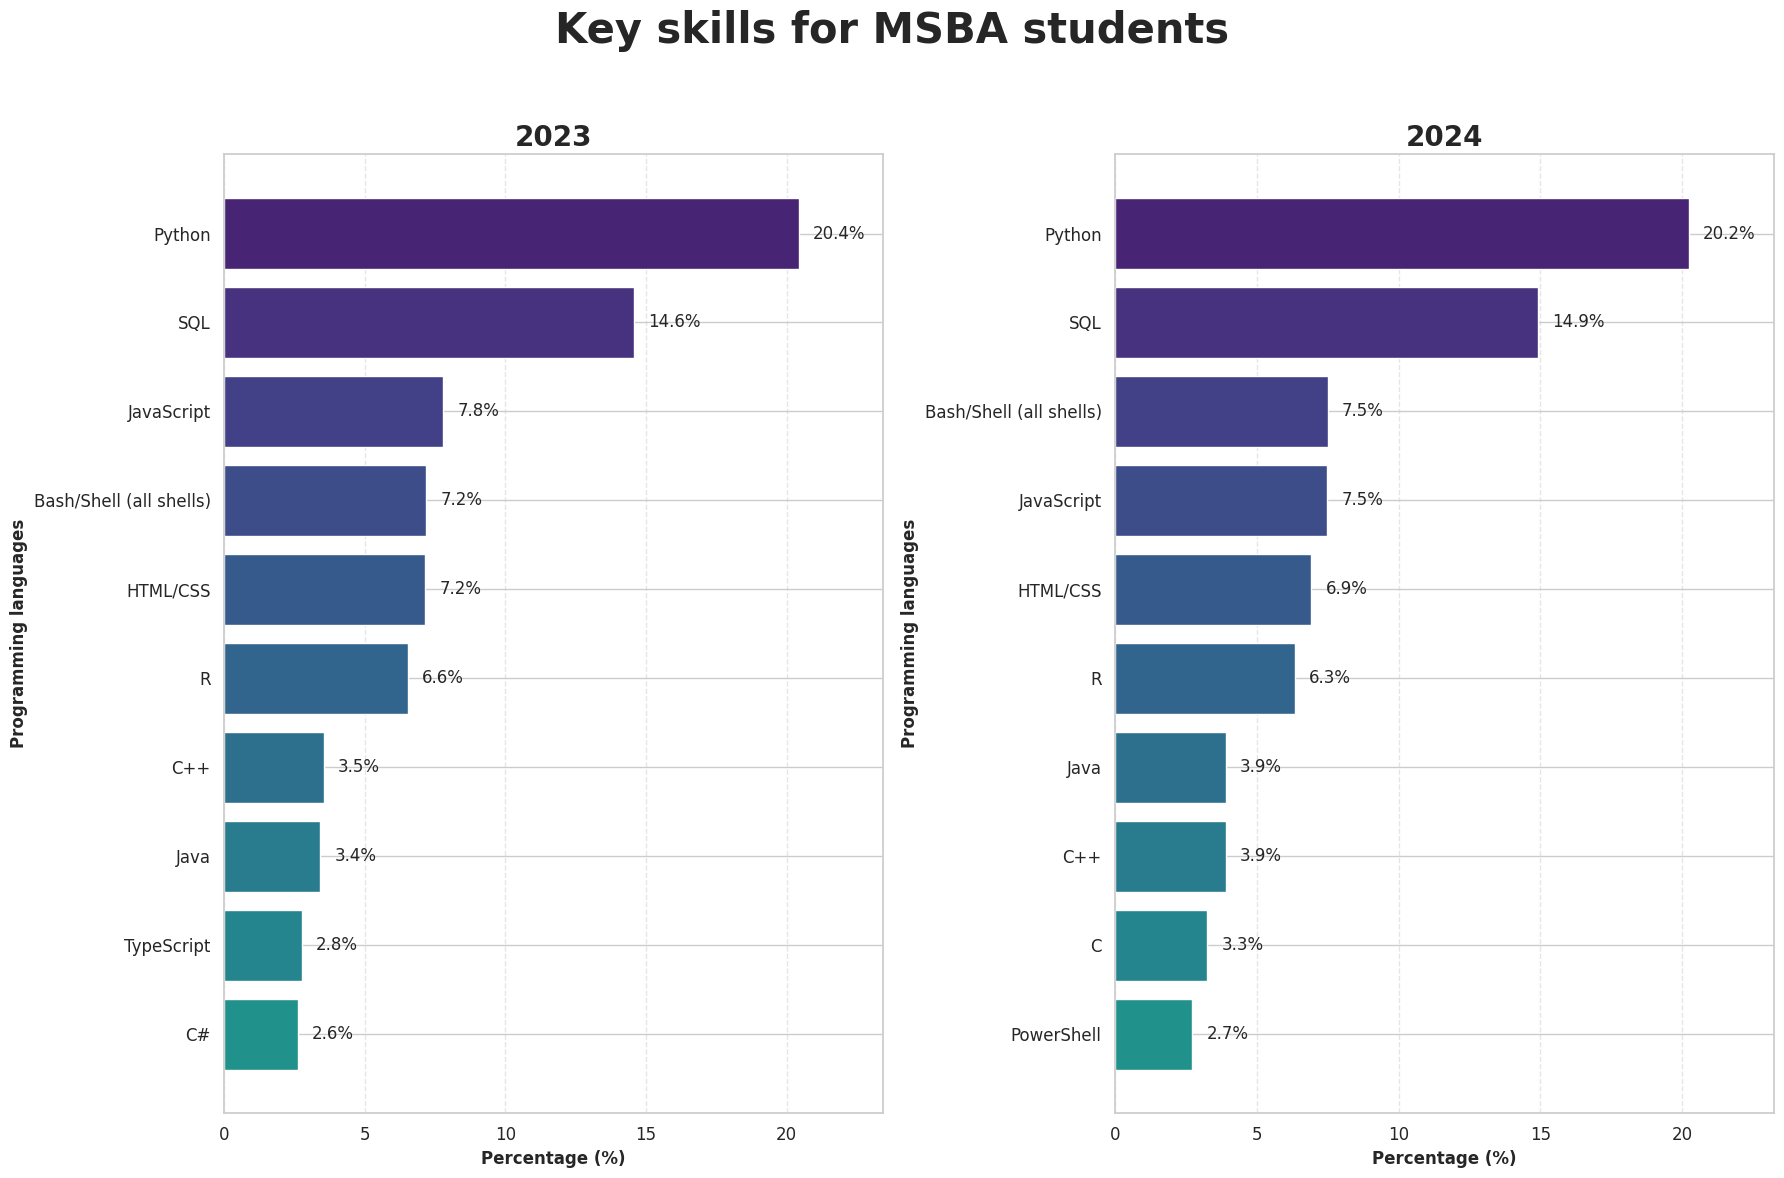

In [ ]:
import matplotlib.cm as cm
colors = plt.cm.Paired(range(10))
fig, axes = plt.subplots(1,2, figsize=(18,12))
# fig.patch.set_facecolor('#f0f0f0')
axes[0].barh(y=data2023_language_using_msba_expanded_all_age['LanguageHaveWorkedWith'][:10],
             width=data2023_language_using_msba_expanded_all_age['percentage'][:10], color=cm.viridis(np.linspace(0.1, 0.5, 10)))
axes[0].invert_yaxis()
for i, v in enumerate(data2023_language_using_msba_expanded_all_age['percentage'][:10]):
    axes[0].text(v +0.5, i, f"{v:.1f}%", va='center')
axes[0].set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Programming languages', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.5)
max_value2023 = data2023_language_using_msba_expanded_all_age['percentage'][:10].max()
axes[0].set_xlim(0, max_value2023 + 3)
axes[0].set_title('2023', fontsize=20, fontweight='bold')
# axes[0].set_facecolor('#f0f0f0')


axes[1].barh(y=data2024_language_using_msba_expanded_all_age['LanguageHaveWorkedWith'][:10],
             width=data2024_language_using_msba_expanded_all_age['percentage'][:10], color=cm.viridis(np.linspace(0.1, 0.5, 10)))
axes[1].invert_yaxis()
for i, v in enumerate(data2024_language_using_msba_expanded_all_age['percentage'][:10]):
    axes[1].text(v +0.5, i, f"{v:.1f}%", va='center')
axes[1].set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Programming languages', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.5)
max_value2024 = data2024_language_using_msba_expanded_all_age['percentage'][:10].max()
axes[1].set_xlim(0, max_value2024 + 3)
axes[1].set_title('2024', fontsize=20, fontweight='bold')
# axes[1].set_facecolor('#f0f0f0')

plt.suptitle('Key skills for MSBA students', fontsize=30, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig('Key skills for MSBA.png', dpi=300, bbox_inches='tight')
plt.show()

*In this part, we focus on potential job roles that MSBA students might pursue after graduation. After analyses, we found that for these specific job roles, the top 5 programming languages are Python ,SQL, Javascript/Bash/Shell and HTML/CSS.These programming languages seems to be similar to previous analyses, which include all kinds of developers. However, the plots indicate that Python and SQL is much more important in job roles that MSBA students want to pursue. Additionally, R becomes the 6th place in the analyses, demonstrating its unique importance in business/data analyst roles.*

**Programming languages that are growing fast.**

                   Language  Percent_2023  Percent_2024  Percent_Difference
38                   Python      8.767589      9.245934            0.478345
5                         C      2.750100      3.144396            0.394296
7                       C++      3.435860      3.724042            0.288182
30              MicroPython      0.000000      0.216710            0.216710
4   Bash/Shell (all shells)      6.416366      6.623851            0.207485
44                      SQL      9.943682     10.114351            0.170669
29                   MATLAB      0.535901      0.662227            0.126327
18                 GDScript      0.221741      0.347682            0.125942
42                     Rust      2.174408      2.269667            0.095259
39                        R      0.671961      0.765848            0.093887


<ipython-input-53-a0add76ee80a>:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




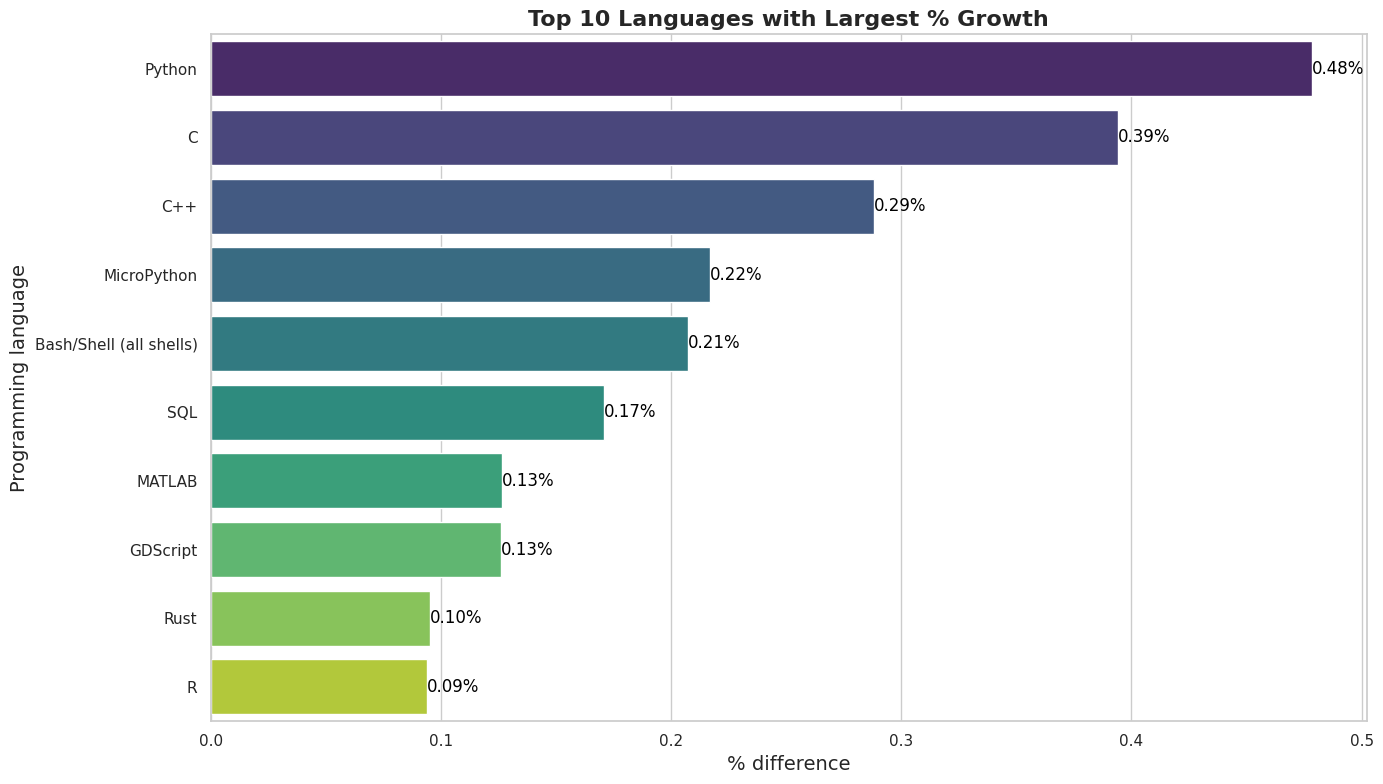

In [ ]:
sns.set(style="whitegrid")

# define a split function
def split_languages(df):
    df = df.copy()
    df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
    df = df.explode('LanguageHaveWorkedWith')
    df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.strip()
    return df

# split and expand the dataset
data2023_expanded = split_languages(data2023_language_using_expanded)
data2024_expanded = split_languages(data2024_language_using_expanded)

# Count the number of times each programming language will be used in 2023
lang_counts_2023 = data2023_expanded['LanguageHaveWorkedWith'].value_counts().reset_index()
lang_counts_2023.columns = ['Language', 'Count_2023']

# Count the number of times each programming language will be used in 2024
lang_counts_2024 = data2024_expanded['LanguageHaveWorkedWith'].value_counts().reset_index()
lang_counts_2024.columns = ['Language', 'Count_2024']

# Calculate sum and percentages
total_2023 = lang_counts_2023['Count_2023'].sum()
total_2024 = lang_counts_2024['Count_2024'].sum()
lang_counts_2023['Percent_2023'] = (lang_counts_2023['Count_2023'] / total_2023) * 100
lang_counts_2024['Percent_2024'] = (lang_counts_2024['Count_2024'] / total_2024) * 100

# Merge two data frameworks
lang_comparison = pd.merge(lang_counts_2023, lang_counts_2024, on='Language', how='outer').fillna(0)

#  Make sure the percentages are floating-point numbers
lang_comparison['Percent_2023'] = lang_comparison['Percent_2023'].astype(float)
lang_comparison['Percent_2024'] = lang_comparison['Percent_2024'].astype(float)

# Calculate the percentage difference between 2024 and 2023
lang_comparison['Percent_Difference'] = lang_comparison['Percent_2024'] - lang_comparison['Percent_2023']

# Filter for languages with positive percentage differences
positive_growth = lang_comparison[lang_comparison['Percent_Difference'] > 0]

# Sort in descending order of percentage difference
positive_growth_sorted = positive_growth.sort_values(by='Percent_Difference', ascending=False)

# Select the top 10 languages with the highest percentage difference
top10_growth_langs = positive_growth_sorted.head(10)
print(top10_growth_langs[['Language', 'Percent_2023', 'Percent_2024', 'Percent_Difference']])

# Draw bar plots using Seaborn
plt.figure(figsize=(14, 8))

sns.barplot(
    x='Percent_Difference',
    y='Language',
    data=top10_growth_langs,
    palette='viridis'
)

# Add title and tag
plt.title('Top 10 Languages with Largest % Growth', fontsize=16, fontweight='bold')
plt.xlabel('% difference', fontsize=14)
plt.ylabel('Programming language', fontsize=14)

# Display a specific percentage difference value on each bar
for index, value in enumerate(top10_growth_langs['Percent_Difference']):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='left', fontsize=12, color='black')

plt.tight_layout()
plt.show()


*The graph shows the top 10 programming languages with the highest percentage growth between 2023 and 2024. Python leads with a 0.48% increase, followed by C (0.39%) and C++ (0.29%), highlighting their ongoing importance. Languages like MicroPython and Bash/Shell also show growth, reflecting the demand for lightweight and efficient solutions. SQL's presence indicates the continued relevance of database management, while Rust and MATLAB gain traction in their respective specialized domains. Overall, the growth trends illustrate the evolving needs in the software development industry.*

**How do the top 10 programming languages in the US compare to their global usage in 2023, and what regional preferences or trends can be observed from the data?**

This method processes the **'LanguageHaveWorkedWith'** column by first splitting multiple programming languages into individual entries using the semicolon separator, and then expanding the dataset to ensure each language is represented in its own row.    The data is then grouped by industry and programming language to count the occurrences of each language.    By converting the counts into percentages based on the total number of respondents, this method provides a normalized comparison.

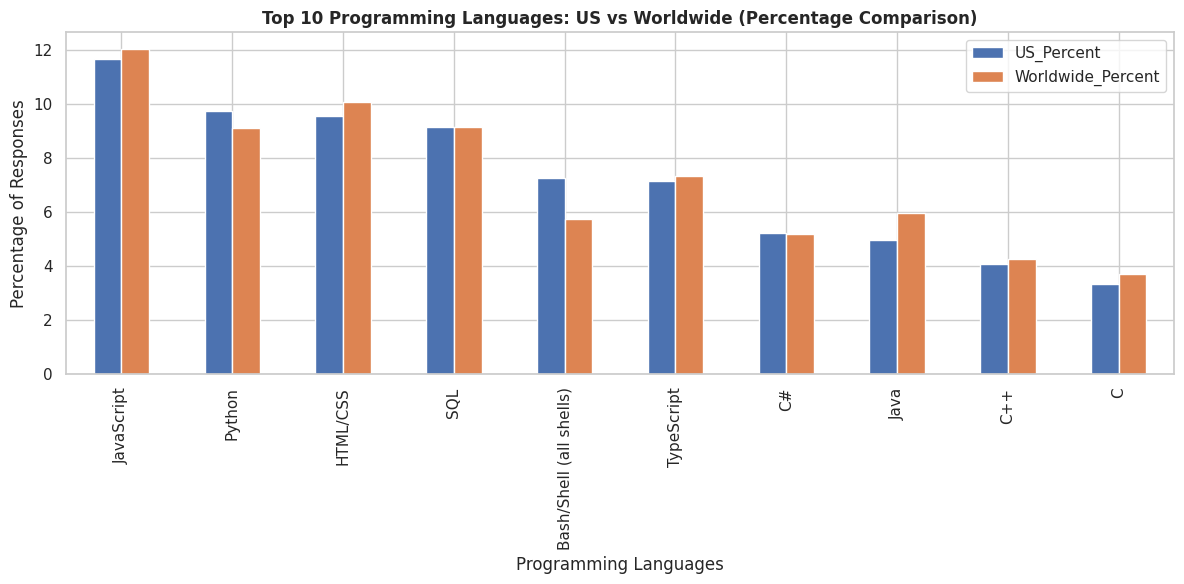

In [ ]:
# Filter data by US and Worldwide
data_us = data2023[data2023['Country'] == 'United States of America']
data_worldwide = data2023[data2023['Country'] != 'United States of America']

# Select necessary columns and drop missing values
columns_of_interest = ['Country', 'Industry', 'LanguageHaveWorkedWith']
data_us = data_us[columns_of_interest].dropna(subset=['LanguageHaveWorkedWith'])
data_worldwide = data_worldwide[columns_of_interest].dropna(subset=['LanguageHaveWorkedWith'])

# Split the 'LanguageHaveWorkedWith' column by semicolon (for multiple languages)
data_us['LanguageHaveWorkedWith'] = data_us['LanguageHaveWorkedWith'].str.split(';')
data_worldwide['LanguageHaveWorkedWith'] = data_worldwide['LanguageHaveWorkedWith'].str.split(';')

# Explode the columns to create one row per language
data_us = data_us.explode('LanguageHaveWorkedWith')
data_worldwide = data_worldwide.explode('LanguageHaveWorkedWith')

# Group by Country and Language, then count occurrences
lang_count_us = data_us.groupby('LanguageHaveWorkedWith').size().reset_index(name='US_Count')
lang_count_worldwide = data_worldwide.groupby('LanguageHaveWorkedWith').size().reset_index(name='Worldwide_Count')

# Calculate the total number of respondents in the US and globally
total_us_respondents = len(data_us)
total_worldwide_respondents = len(data_worldwide)

# Merge the counts for comparison
lang_comparison = pd.merge(lang_count_us, lang_count_worldwide, on='LanguageHaveWorkedWith', how='outer').fillna(0)

# Convert the count to a percentage and sort by percentage of US, selecting the top 10 programming languages
lang_comparison['US_Percent'] = (lang_comparison['US_Count'] / total_us_respondents) * 100
lang_comparison['Worldwide_Percent'] = (lang_comparison['Worldwide_Count'] / total_worldwide_respondents) * 100
top_10_langs = lang_comparison.sort_values(by='US_Percent', ascending=False).head(10)

#Visualize the comparison of percentages for the top 10 languages
top_10_langs.plot(kind='bar', x='LanguageHaveWorkedWith', y=['US_Percent', 'Worldwide_Percent'], figsize=(12,6))

plt.title('Top 10 Programming Languages: US vs Worldwide (Percentage Comparison)', fontweight = 'bold')
plt.ylabel('Percentage of Responses')
plt.xlabel('Programming Languages')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

*JavaScript, Python, and HTML/CSS are the top three languages in the U.S. and globally, and their percentage differences are small. Bash/Shell, TypeScript, and Java seem to be used slightly more globally than in the US. To some extent, the distribution of programming language usage is fairly consistent in the United States and worldwide, with slight variations in some languages.*

##**LinkedIn Jobs Scraping**

We scraped LinkedIn Jobs for "Software Developer" titles in the US. And saved the data for 114 jobs in the file - finalJobs.csv which is loaded and will be read and worked upon in the coming section for analysis.

Reading the scraped data

In [ ]:
linkedin_jobs_df = pd.read_csv('finalJobs.csv')

In [ ]:
linkedin_jobs_df['Requirements']

,Requirements
0,requirements for data and analytics
1,Job Requirements\nSoftware expert with strong ...
2,Requirements\n6+ years of experience with iOS ...
3,"Who You Are \n\nYou're hungry, humble, smart. ..."
4,skills to support development and maintenance ...
...,...
109,skills and a keen aptitude for managing their ...
110,Qualifications\n\nPreferences\n\nFull stack de...
111,looking to stretch and grow your career our cu...
112,skills across our market-leading SaaS Product....


This method processes the 'Requirements' column by converting the text to lowercase, tokenizing it, and removing predefined stopwords to standardize the data. Subsequently, a word cloud is generated using the WordCloud library, allowing for the visualization of the most frequently occurring terms, which provides insights into common job requirements.

Word Cloud - out of Job Description and Requirements

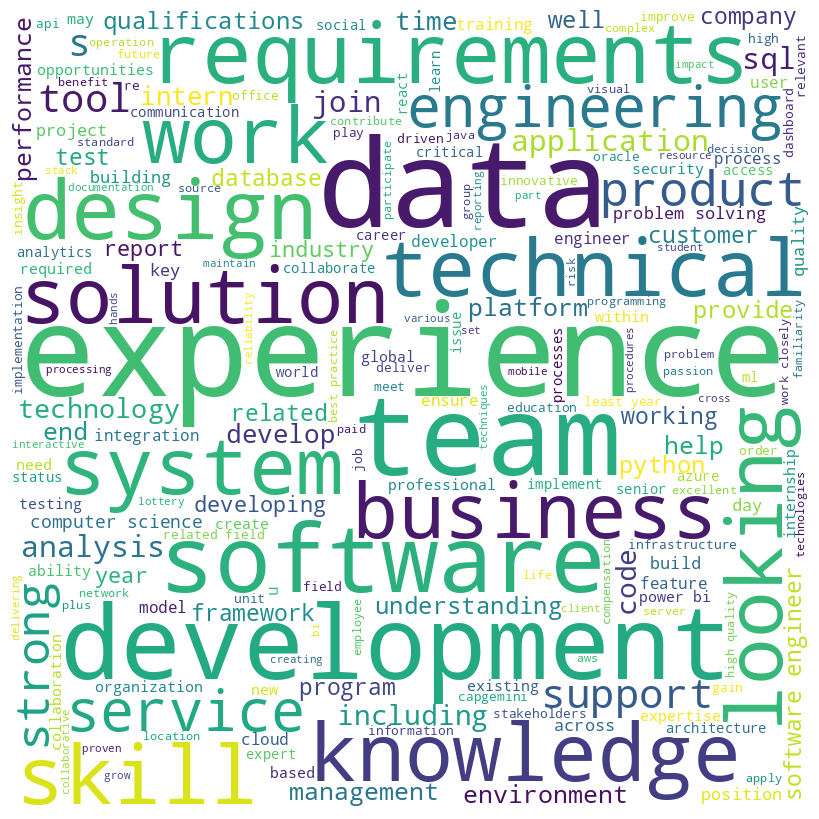

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['will','using'])

# iterate through the csv file
for val in linkedin_jobs_df['Requirements']:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

*The most common skills and requirements in technology job postings emphasize experience in software development, data management, system design, and teamwork. Keywords such as "data," "software," "technical," and "business" suggest that companies seek candidates with strong technical expertise and the ability to solve business problems. To align recruitment strategies, organizations should highlight opportunities for growth in these areas, focus on collaborative work environments, and showcase the importance of applying technical skills to create business solutions. This approach will help attract well-rounded candidates who can thrive in both technical and business domains.*

**What are most mentioned technologies in the linkedIn job postings?**


In [ ]:
# Define the updated pattern including more languages and tools
languages_tools_pattern = (
    '\\bPython\\b|\\bJava\\b|\\bC\\+\\+\\b|\\bC#\\b|\\bJavaScript\\b|\\bTypeScript\\b|\\bRuby\\b|\\bPHP\\b|\\bSwift\\b|'
    '\\bKotlin\\b|\\bR\\b|\\bGo\\b|\\bRust\\b|\\bScala\\b|\\bPerl\\b|\\bSQL\\b|\\bHTML\\b|\\bCSS\\b|\\bMATLAB\\b|\\bDart\\b|'
    '\\bReact\\b|\\bAngular\\b|\\bNode\\.js\\b|\\bVue\\.js\\b|\\bAWS\\b|\\bAzure\\b|\\bGCP\\b|\\bDocker\\b|\\bKubernetes\\b|'
    '\\bTensorFlow\\b|\\bPyTorch\\b|\\bDjango\\b|\\bFlask\\b|\\bSpring\\b|\\bLaravel\\b|\\bjQuery\\b|\\bASP\\.NET\\b|'
    '\\bExpress\\.js\\b|\\bJenkins\\b|\\bAnsible\\b|\\bTerraform\\b|\\bChef\\b|\\bPuppet\\b|\\bHadoop\\b|\\bSpark\\b|'
    '\\bElasticsearch\\b|\\bMySQL\\b|\\bPostgreSQL\\b|\\bMongoDB\\b|\\bBash\\b|\\bPowerShell\\b'
)

# Define the function to extract languages and tools, ignoring case
def extract_languages_tools(text):
    if isinstance(text, str):
        found_languages_tools = re.findall(languages_tools_pattern, text, flags=re.IGNORECASE)
        return ', '.join(set(found_languages_tools))  # Return unique languages/tools found
    return None

# Apply the extraction function to both 'Job Description' and 'Requirements', handling NaN values
linkedin_jobs_df['languages_tools_in_job'] = linkedin_jobs_df.apply(
    lambda row: extract_languages_tools(
        str(row['Job Description']) + ' ' + str(row['Requirements'])
    ), axis=1
)

# Clean up the column by removing None values and checking for duplicates
linkedin_jobs_df['languages_tools_in_job'] = linkedin_jobs_df['languages_tools_in_job'].fillna('')

# Flatten the list of extracted languages/tools and create a frequency count
language_tool_counts = Counter([lang.strip().lower() for langs in linkedin_jobs_df['languages_tools_in_job'] for lang in langs.split(', ') if lang])

# Convert to a DataFrame for visualization
language_tool_df = pd.DataFrame(language_tool_counts.items(), columns=['Language/Tool', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 10 most frequently mentioned languages and tools
print(language_tool_df.shape)


(39, 2)


<ipython-input-70-90753f135979>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



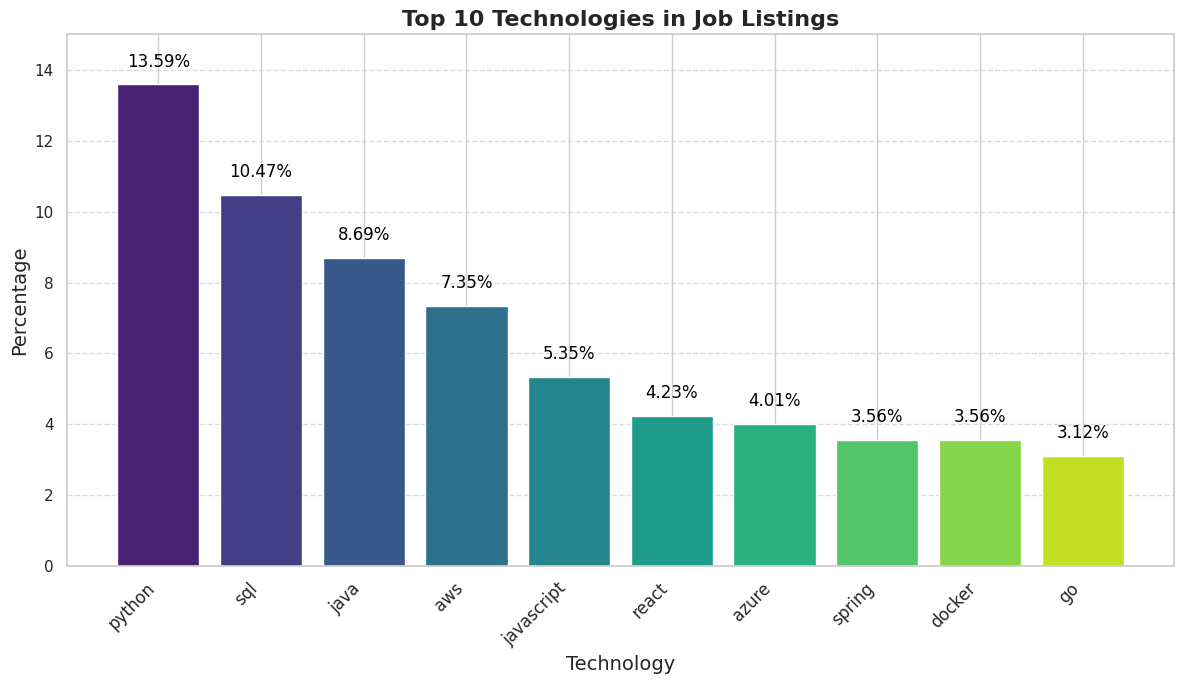

In [ ]:
total_count = language_tool_df['Count'].sum()

top_10_tools = language_tool_df.head(10)
top_10_tools['Percentage'] = (top_10_tools['Count'] / total_count) * 100


plt.figure(figsize=(12, 7))

colors = sns.color_palette("viridis", len(top_10_tools))


bars = plt.bar(top_10_tools['Language/Tool'], top_10_tools['Percentage'], color=colors)


for i in range(len(top_10_tools)):
    plt.text(i, top_10_tools['Percentage'].iloc[i] + 0.5, f"{top_10_tools['Percentage'].iloc[i]:.2f}%",
             ha='center', fontsize=12, color='black')

plt.ylim(0, 15)


plt.title('Top 10 Technologies in Job Listings', fontsize=16, fontweight='bold')
plt.xlabel('Technology', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a grid for cleaner visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Show the plot
plt.show()


*The chart shows that Python (13.59%) and SQL (10.47%) are the most in-demand technologies in linkedin job listings, indicating a strong focus on data analytics and programming across industries. Java (8.69%) and AWS (7.35%) also demonstrate significant demand, particularly for enterprise applications and cloud infrastructure. Technologies such as React, Azure, and Docker highlight the increasing reliance on web development frameworks and cloud services, essential for modern, scalable business solutions.*

**What are the top correlated skills in job descriptions?**

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



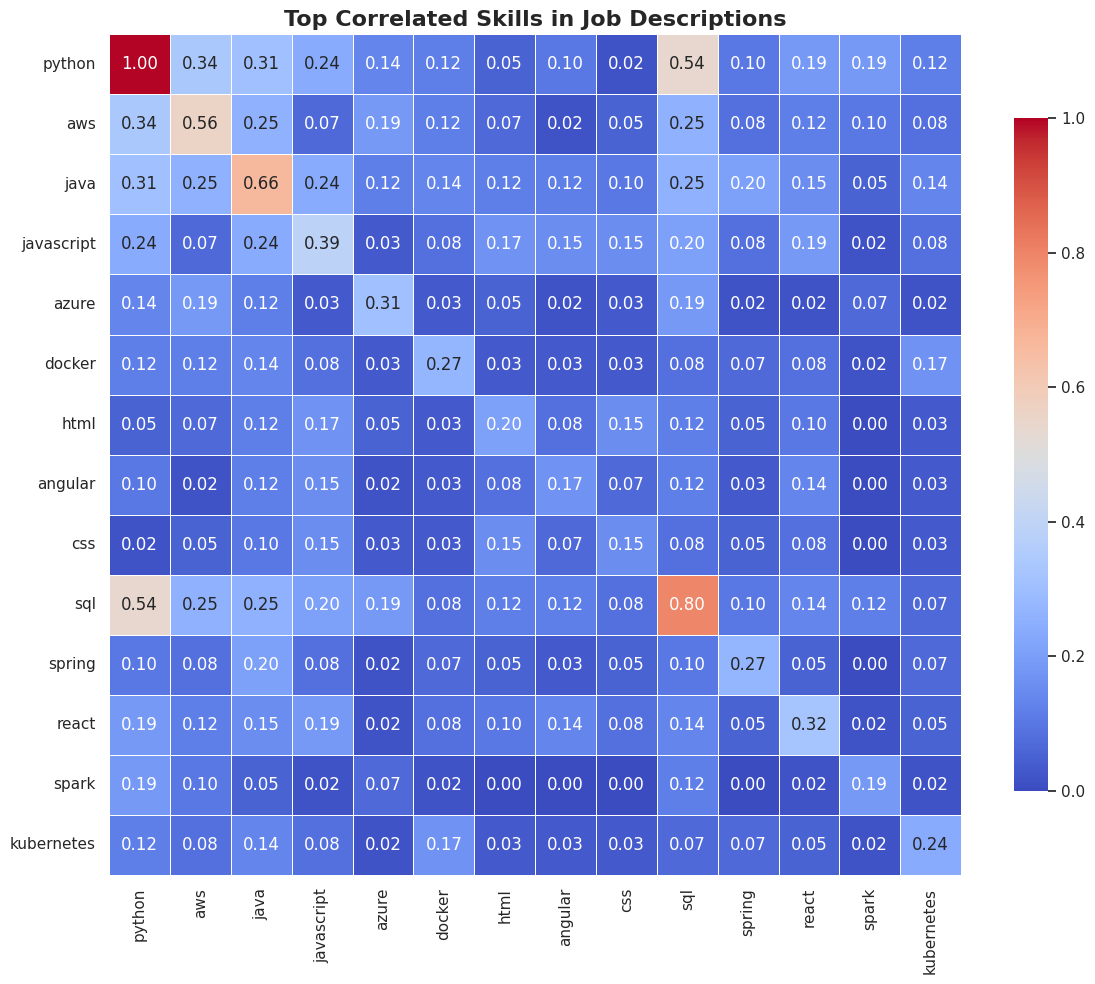

In [ ]:
# Create a co-occurrence matrix
cv = CountVectorizer(tokenizer=lambda x: x.split(', '), binary=True)
co_occurrence = cv.fit_transform(linkedin_jobs_df['languages_tools_in_job'])

# Create a co-occurrence DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence.T.dot(co_occurrence).toarray(),
                                index=cv.get_feature_names_out(),
                                columns=cv.get_feature_names_out())

normalized_co_occurrence_df = co_occurrence_df / co_occurrence_df.values.max()

# Flatten the matrix and filter out the diagonal (self-correlations)
flattened_co_occurrence = normalized_co_occurrence_df.where(np.triu(np.ones(normalized_co_occurrence_df.shape), k=1).astype(bool)).stack()

top_15_pairs = flattened_co_occurrence.nlargest(20)

# Extract the unique skills from the top 15 pairs
top_15_skills = pd.Index(top_15_pairs.index.get_level_values(0).tolist() + top_15_pairs.index.get_level_values(1).tolist()).unique()

# Filter the co-occurrence matrix to keep only the top 15 skills
filtered_co_occurrence_df = normalized_co_occurrence_df.loc[top_15_skills, top_15_skills]

# Plot the heatmap for the top 15 correlated skills
plt.figure(figsize=(12, 10))

# Create the heatmap with the filtered matrix
sns.heatmap(filtered_co_occurrence_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, cbar_kws={'shrink': 0.8})

# Rotate x and y labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Add titles and labels
plt.title('Top Correlated Skills in Job Descriptions', fontsize=16, fontweight='bold')
plt.tight_layout()

# Show the heatmap
plt.show()


*The heatmap reveals key clusters of correlated skills in job descriptions. Python and SQL are frequently mentioned together (0.54), signifying their dominant roles in data analysis, machine learning, and backend development. Java and SQL show the strongest correlation (0.80), indicating their widespread use in enterprise applications. Cloud technologies like AWS, Docker, and Kubernetes have moderate correlations, reflecting their importance in cloud infrastructure and DevOps practices. Web development tools such as JavaScript, React, and Angular appear together, indicating demand for full-stack development. Overall, the chart underscores the integration of data-centric technologies, cloud infrastructure, and modern web frameworks in job postings.*


##**Machine Learning - Clustering**


In this section, we explore the application of clustering techniques to identify patterns within the survey data for 2023 and 2024. Clustering helps group respondents based on their working experience with programming languages and developer roles. By segmenting the data into clusters, we can uncover relationships between the types of developer roles and the technologies they are most familiar with, providing valuable insights into technology usage across different respondent groups.

We employed the KMeans clustering algorithm to group respondents from the survey datasets for 2023 and 2024. The clustering was based on the following features:

Programming languages respondents have worked with (LanguageHaveWorkedWith)
Developer roles (DevType)

**What are the prominent clusters among developers in the 2023 dataset based on the programming languages they have used and their development roles, and how do these clusters differ in terms of size and composition?**

In [ ]:
encoder = OneHotEncoder()

features = ['LanguageHaveWorkedWith', 'DevType']

# Use OneHotEncoder on categorical columns
encoded_features = encoder.fit_transform(data2023_language_using_expanded[['LanguageHaveWorkedWith', 'DevType']])


combined_data = pd.concat([
    pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())
], axis=1)

# Perform KMeans clustering with the combined data
kmeans = KMeans(n_clusters=5, random_state=42)
data2023_language_using_expanded['Cluster'] = kmeans.fit_predict(combined_data)


In [ ]:
cluster_summary = data2023_language_using_expanded.groupby('Cluster').agg({
    'ResponseId': 'count'
}).rename(columns={'ResponseId': 'Count'}).reset_index()

# Add hover information for top 3 languages and developer types
hover_text = []

for cluster in range(5):
    cluster_data = data2023_language_using_expanded[data2023_language_using_expanded['Cluster'] == cluster]

    top_languages = cluster_data['LanguageHaveWorkedWith'].value_counts().head(3).index.tolist()
    top_devtypes = cluster_data['DevType'].value_counts().head(3).index.tolist()

    hover_text.append(f"Cluster {cluster}<br>Top Languages: {', '.join(top_languages)}<br>Top Dev Types: {', '.join(top_devtypes)}")

# Add hover text to the summary DataFrame
cluster_summary['hover_text'] = hover_text

# Create a bubble chart using Plotly
fig = px.scatter(
    cluster_summary,
    x='Cluster',
    y='Count',
    size='Count',
    hover_name='hover_text',
    title='<b> 2023 Cluster Insights: Top Languages & Dev Types</b>',
    labels={'Cluster': 'Cluster', 'Count': 'Number of Respondents'},
    color='Cluster',
    size_max=60,
    template='plotly_dark'
)

# Show the figure
fig.show()


The KMeans clustering analysis for 2023 identified distinct groups of developers based on their experience with programming languages and developer roles. Cluster 0, for example, prominently features web development technologies like HTML/CSS, SQL, and TypeScript, with many respondents identifying as full-stack developers. These clusters provide valuable insights into the dominant technologies and skill sets used by developers across different fields.

**What are the prominent clusters among developers in the 2024 dataset based on the programming languages they have used and their development roles, and how do these clusters differ in terms of size and composition?**

In [ ]:
encoder = OneHotEncoder()

# Add more relevant features to the clustering
features = ['LanguageHaveWorkedWith', 'DevType']

# Use OneHotEncoder on categorical columns
encoded_features = encoder.fit_transform(data2024_language_using_expanded[['LanguageHaveWorkedWith', 'DevType']])

# Combine with numerical features (e.g., Age)
combined_data = pd.concat([
    pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())
], axis=1)

# Perform KMeans clustering with the combined data
kmeans = KMeans(n_clusters=5, random_state=42)
data2024_language_using_expanded['Cluster'] = kmeans.fit_predict(combined_data)


In [ ]:
# Create a summary DataFrame for clusters
cluster_summary = data2024_language_using_expanded.groupby('Cluster').agg({
    'ResponseId': 'count'
}).rename(columns={'ResponseId': 'Count'}).reset_index()

# Add hover information for top 3 languages and developer types
hover_text = []

# Correct the boolean Series filtering using .loc
for cluster in range(5):
    cluster_data = data2024_language_using_expanded.loc[
        data2024_language_using_expanded['Cluster'] == cluster
    ]

    # Process cluster data
    top_languages = cluster_data['LanguageHaveWorkedWith'].value_counts().head(3).index.tolist()
    top_devtypes = cluster_data['DevType'].value_counts().head(3).index.tolist()
    hover_text.append(f"Cluster {cluster}<br>Top Languages: {', '.join(top_languages)}<br>Top Dev Types: {', '.join(top_devtypes)}")

# Add hover text to the summary DataFrame
cluster_summary['hover_text'] = hover_text

# Create a bubble chart using Plotly
fig = px.scatter(
    cluster_summary,
    x='Cluster',
    y='Count',
    size='Count',
    hover_name='hover_text',
    title='<b> 2024 Cluster Insights: Top Languages & Dev Types</b>',
    labels={'Cluster': 'Cluster', 'Count': 'Number of Respondents'},
    color='Cluster',
    size_max=60,  # Adjust max bubble size
    template='plotly_dark'  # Optional theme
)

# Show the figure
fig.show();


In the 2024 analysis, similar patterns were observed, with clusters highlighting the top technologies, such as JavaScript and SQL, used by respondents across different roles, including back-end, front-end, and full-stack developers. Comparing the clusters between 2023 and 2024 helps in understanding evolving technology trends and the shifts in developer expertise, making this analysis useful for tracking changes in developer preferences and the demand for specific technologies over time.

##**Ending Notes**

**Challeneges and Conclusion**

**Challenges**

*Challenges Faced and Solutions:*

1. Data Inconsistencies and Missing Values:
Challenge: The datasets from Stack Overflow for 2023 and 2024 contained missing values and inconsistencies in the column names.
*Solution*: We standardized the columns across both datasets, renaming fields like AISearchDevHaveWorkedWith to maintain consistency. We also used filtering techniques to drop rows with critical missing data, ensuring the analysis was based on accurate and comparable information.
2. Handling Outliers in Compensation Data:
Compensation data included extreme outliers (e.g., salaries over a million dollars or unrealistic values in the billions) which could distort average compensation figures.
*Solution*: We set realistic thresholds and manually reviewed and removed extreme cases. This approach helped in presenting a more accurate representation of salary trends.
3. Language Splitting and Expansion:
Fields like LanguageHaveWorkedWith and ToolsTechHaveWorkedWith often contained multiple values separated by semicolons. It was necessary to split these entries to analyze individual technologies and tools.
*Solution*: We created functions to split and expand these columns into individual entries, allowing for more granular analysis. This enabled us to perform clustering and calculate language/tool usage percentages effectively.
4. Compensation Comparison Across Currencies:
Some salary data was reported in currencies other than USD, complicating direct comparisons and trend analysis.
*Solution*: We decided to focus on respondents who reported salaries in USD (United States) to ensure consistency in our analysis. This choice allowed us to maintain uniformity in the compensation analysis.
5. Web Scraping Challenges (LinkedIn Data):
Scraping LinkedIn job postings posed issues due to the platform's anti-bot measures and varying job description formats.
*Solution*: We used dynamic web scraping techniques and set pauses between requests to mimic human behavior. We also created regex patterns to extract relevant technologies from job descriptions and requirements.

**Conclusion**

In the current challenging job market, understanding the latest trends in technology and the demand for programming skills has become crucial. From our analysis, we found that the adoption and usage of AI tools between 2023 and 2024 has shown a dynamic shift, with ChatGPT experiencing a notable decrease in use, while specialized AI applications such as GitHub Copilot and Google Gemini gained momentum. This reflects a growing preference for tools tailored to specific developer needs.

In terms of programming languages, Python and JavaScript maintained their strong popularity across all age groups, though newer languages like Rust and Go have started gaining traction, particularly among mid-career professionals. Furthermore, organizations have also shown changing preferences for tools and technologies based on their size, with PHP rising in prominence in mid-to-large companies, indicating its continued relevance.

On the other hand, database usage remained relatively stable, with PostgreSQL, MySQL, and SQLite leading both in 2023 and 2024. As for cloud platforms, they are still dominated by Amazon Web Services (AWS) and Microsoft Azure, emphasizing their continued importance in IT infrastructure.

For the salary analysis, it reveals that senior-level positions such as AI Developers, Engineering Managers, and Senior Executives continue to command the highest pay, with average salaries around or exceeding 200,000. On the other hand, roles like Front-end Developers, QA Testers, and Business Analysts earn between 90,000 and 110,000. Interestingly, the high salaries for AI-related positions reflect the increasing demand for advanced technical expertise and leadership roles in a rapidly evolving field.

For job listings on LinkedIn, there is a strong demand for programming languages like Python and SQL, which are heavily used in data analytics and backend development. Additionally, these two technologies are frequently mentioned together, highlighting their dominance in data analysis, machine learning, and backend development. Furthermore, AWS, React, and Docker skills remain highly sought after, showcasing the importance of cloud services and web development frameworks for modern business solutions. This aligns with the growing emphasis on data-centric roles and the need for professionals skilled in managing scalable, cloud-based architectures.

Finally, for MSBA graduates, key programming languages such as Python and SQL are essential for business and data analyst roles. Graduates aiming for these roles should focus on enhancing their skills in these areas to increase their employability.

Overall, our analysis provides insights into the current job trends and in-demand skills from 2023 and 2024, hoping that understanding these emerging trends can help professionals and students better align their skills with employer demands, thereby increasing their chances of securing high-paying, in-demand roles.



**References and Genrative AI Disclosure**

**References**


1.    https://www.forbes.com/sites/jackkelly/2024/06/13/why-is-it-so-hard-to-find-a-job/

2.   https://time.com/6287012/why-finding-job-is-difficult/

3. https://www.geeksforgeeks.org/python-web-scraping-tutorial/

4. https://realpython.com/python-web-scraping-practical-introduction/

5. https://stackoverflow.com/questions/23415500/plotting-a-stacked-bar-chart

6. https://medium.com/@sunqlee1004/implementing-k-means-clustering-with-python-for-data-analysis-43c41f8390d1

7. https://www.w3schools.com/python/python_regex.asp



**Generative AI Disclosure:**
In completing this project, we effectively utilized ChatGPT to enhance our understanding of both conceptual and advanced concepts related to Pandas and plotting. Below is a detailed account of its applications:

**Content Development:** We leveraged ChatGPT to brainstorm and generate initial ideas for our project. The AI helped us craft a clear thesis statement and outline the key sections, ensuring that our structure was coherent and aligned with our objectives.

**Learning Advanced Concepts:** ChatGPT served as a resource for learning advanced features of the Pandas library and effective plotting techniques. It provided explanations and examples that deepened our understanding of data manipulation and visualization, which were essential for our analysis.

**Research Summarization:** The AI proved invaluable in summarizing complex research articles and topics relevant to our project. By generating concise overviews, it allowed our team to grasp essential concepts quickly, facilitating smoother integration of these ideas into our analysis.

**Technical Guidance:** We consulted ChatGPT for advice on best practices in data analysis and visualization techniques. It provided recommendations for tools and methods suitable for our project, enhancing our overall approach.

**Draft Review:** Throughout the writing process, ChatGPT assisted in refining our drafts. The AI offered suggestions for improving clarity and readability, helping us to convey our findings effectively.

Our team rigorously reviewed and edited all content generated by ChatGPT to ensure accuracy and originality, adhering to our academic integrity standards.
